# Sentiment Analysis with TextBlob

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from textblob import TextBlob
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import train_test_split

In [47]:
eng_tweets = pd.read_pickle('../data/eng_tweets.p')

In [48]:
eng_tweets.account_category.value_counts()

RightTroll      646007
NewsFeed        541260
LeftTroll       385410
HashtagGamer    204239
Commercial      112580
Fearmonger       10524
Unknown           6496
Name: account_category, dtype: int64

In [49]:
targets = ['RightTroll', 'LeftTroll', 'NewsFeed', 'Fearmonger']
eng_tweets = eng_tweets.loc[eng_tweets.account_category.isin(targets)]

In [50]:
eng_tweets.content = eng_tweets.content.apply(lambda x: x.replace('"', ''))
eng_tweets.content = eng_tweets.content.apply(lambda x: x.replace("'", ''))
eng_tweets.content = eng_tweets.content.apply(lambda x: '"' + str(x) + '"')

In [51]:
eng_tweets['sentiment'] = eng_tweets.content.astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

In [119]:
for tweet in eng_tweets.content:
    #print([tag for word, tag in TextBlob(tweet).tags])
    print([word for word, tag in TextBlob(tweet).tags if tag=='NNP'])

['Democrat', 'US', 'Senator']
['Marshawn', 'Lynch', 'Lynch', 'vs']
['Navy', 'Sailor', 'NFL']
['IN', 'President', 'Trump', 'Cup', 'Florida', 'Texas', 'Puerto', 'Rico']
['RESPECTING', 'National', 'Anthem']
['Dan', 'Bongino', 'Nobody', 'Donald', 'Trump', 'Exactly']
[]
['Doesnt', 'CNN']
['CNN', 'EVERYTHING', 'Trump', 'PR']
['San', 'Juan', 'Mayor']
['San', 'Juan', 'Mayor']
[]
['Sanders', 'NBC', 'Trump']
['Hi', 'Weinstein', 'Do']
['Hi', 'Harvey', 'Weinstein', 'Do']
['Wow', 'Even', 'CNN', 'Obamas', 'Weinstein', 'Where', 'Michelle', 'Obama', 'Where', 'President', 'Obama']
['Melania', 'Trump', 'Huntington', 'West', 'Virginia']
['Harvey', 'Weinstein', 'Ambra', 'Gutierrez']
[]
['Hillary', 'NRA', 'Harvey', 'Weinstein']
['President', 'Trump', 'Kirstjen', 'Nielsen']
['Kirstjen', 'Nielsen', 'Secretary', 'Homeland', 'Security', 'Well']
[]
['Scout', 'Boy', 'Scouts', 'Girl', 'Scouts', 'Dont']
['Eminem', 'Sad']
['Boy', 'Scouts']
['Trump', 'NUKE-truth-bomb', 'NFL', 'Kaepernick']
['Staff', 'John', 'Kelly']

['Playboy', 'Hugh', 'Hefner', 'Rest']
['Id', 'Hugh', 'Hefner']
['Hugh', 'Hefner']
['Melania', 'Trump', 'Dr', 'Seuss']
['Cat', 'Hat', 'Oh']
['Michele', 'Obama', 'Dr', 'Seuss', 'Cat', 'Hat', 'Johannesburg', 'Outrageous']
['Chicago']
[]
[]
['House', 'Steve', 'Scalise']
['Mr', 'President']
[]
['Colin', 'Kaepernick', 'Looks']
['CNN', 'Theyll', 'Trump']
['Did', 'ISIS']
[]
['Im']
['San', 'Juan', 'Mayor', 'Doing', 'PR']
['Trumps']
[]
[]
['JOB']
['JOB']
['Puerto', 'Rico-gt']
['PR', 'MSM', 'Trump']
[]
['Hey', 'Be']
['CNN']
['White', 'House', 'Please', 'Retweet']
['Trump']
['Hurricane', 'Irma']
['Milo', 'Yiannopoulos', 'Twitter']
['Cant', 'Wont']
[]
[]
['Theyre']
['Morning', 'Friends', 'Fellow', 'Know', 'Your', 'Busy', 'Could', 'Please', 'Time', 'Solid', 'Great', 'Patriot', 'Please', 'Thanks']
['Antifa']
['United', 'Sign', 'Twitter']
['United', 'Sign', 'Twitter']
['CNN']
[]
[]
['Facebook', 'ISIS']
['Goodnight', 'Twitter']
['Please', 'FOLLOW', 'TENESSEE', 'Theyve']
[]
[]
['White', 'House', 'Please

['Police', 'STILL', 'October']
[]
['POLICE', 'IS', 'RUNNING', 'OUT', 'OF', 'FUCKS', 'TO', 'ABOUT', 'CITIZENS', 'LIVES']
[]
[]
[]
['Police']
[]
[]
['Help', 'Iowa', 'Apply']
[]
['FBI', '’', 'Uniform', 'Crime', 'Report']
[]
[]
['Watch', 'Michelle', 'Obama', 'Slams', 'Hillary']
['Woman']
['My', 'WTF']
[]
[]
[]
['Ima']
['Oh', 'God']
[]
['Bae']
['Sixth', 'Tucson']
[]
['Ignore', '’']
['NWA', 'Playing']
['’']
[]
[]
['Bae']
[]
['CHILDMOLESTOR', 'Cop']
['Officer']
['Alabama', '’']
[]
[]
[]
['Look']
[]
[]
['THIS', 'FOR', 'REAL']
['NOT', 'OK', 'Officer', 'Bad', 'Officer']
[]
[]
['LIT']
['William', 'Tolman', 'High', 'School', 'Pawtucket']
['Destroyed', 'IDs']
['State']
['Flag', 'Flagrant', 'Unsportsmanlike', 'Conduct', 'Lifetime', 'Ejection', 'Team', 'Additional', 'Sanctions']
['ƃuᴉʞoɾ', 'ɯI']
[]
['Ill']
['Jus', 'African-Americans']
[]
['MU']
['Wednesday']
['Was', 'Awesome']
['Was', 'Awesome']
['Black', 'Matter']
['United']
[]
[]
[]
[]
['Bye', 'Roberta', 'Bye', 'Felicia']
[]
[]
['Drs/Drs']
['Office

['Dont', 'Jordan', 'ya']
['Goood']
[]
[]
[]
[]
[]
['Fck']
[]
[]
[]
[]
['Lmaooo', 'Get']
['Malcolm', 'X', 'Racism']
['Don', '’', 'Dave', 'Dennis', 'CORE', 'Activist', 'Summer']
[]
['Malcolm', 'X']
['USAThey', '’', 'Nelson', 'Mandela']
['National', 'Front', 'Lewisham', 'London']
['—', 'Maya', 'Angelou', 'Heart', 'Woman']
['Loneliness', 'Black', 'Republican', 'Pragmatic', 'Politics', 'Pursuit', 'Power', 'Leah', 'Wright', 'Rigueur']
[]
[]
['US', '’', 'Warren']
['Elizabeth', 'Warren', 'Washington', 'Post']
[]
['Batman', 'Comics', 'Take', 'Police', 'Brutality', 'Systemic', 'Racism', 'Law', 'Enforcement']
[]
['Flatbush', 'ZOMBi', 'ES', 'Blacktivist', 'Official', 'Music', 'Video', 'CULTURE']
[]
[]
['Black']
['Hello', 'Im', 'Thank']
['Black']
[]
['Naomi', 'Campbell', 'Lui', 'Magazine', 'October']
[]
[]
['Hes', 'Did']
[]
['Black', 'AGREE', 'Retweet']
[]
[]
[]
[]
[]
[]
[]
[]
['Dstrkt', 'West', 'London']
[]
[]
[]
['Black']
[]
[]
[]
['Black']
['Fight']
[]
[]
[]
[]
['Suburban']
[]
[]
['NYPD', 'FIRE'

[]
[]
['Hope']
[]
[]
['Pennsylvania']
['Pontiac', 'Oakland', 'County', 'Sheriffs', 'Office']
['Police', 'Officer', 'Bismarck', 'ND']
[]
['Me', 'Twitter', 'Twitter']
['BLM']
[]
[]
['Deon', 'Long']
['LMMFAOOOOOO']
['Bodycams']
['FOR', 'Van', 'Dyke', 'SET', 'AT', 'MLN']
['Black', 'Student', 'Movement']
['Black', 'Student', 'Movement']
[]
[]
[]
[]
['Bring']
['Cop', 'Ram', 'SUV', 'Man', '’', 'Car', 'Him', 'Accountable']
[]
['Tamir', 'Rices']
[]
[]
['Gowdy']
['WTF', 'Attorney', 'Rape']
[]
[]
[]
['Cop']
['Blind', 'Man', 'Help', 'Cop', 'Shows', 'Up', 'Beats', 'Him', 'No', 'Reason']
[]
['COrder', 'Atlanta']
['Court', 'Tosses', 'Bogus', 'Wiretapping', 'Charge', 'Against', 'Man', 'Who', 'Cops', 'Who', 'House']
['NYPD']
['Handcuffed', 'Custody', 'Special', 'Police']
[]
[]
[]
['’']
[]
[]
[]
[]
['LSP', 'No']
['Their']
['FBI', 'Agent', 'Found', 'Guilty', 'Assaulting', 'Innocent', 'Child', 'Video', '—', 'Keeps', 'Job', 'Badge', 'Gun']
[]
[]
[]
['BREAKING', 'Video']
[]
['Cops', 'Decertified', 'Child', 

[]
['Aiyana', 'Stanley-Jones', 'TODAY']
['Reward', 'Shooting', '9-Year-Old', 'Milwaukee', 'Girl', 'Who', 'Police', 'Her', 'Safe']
[]
['Blacks']
['LMAO']
['Angela', 'Davis', 'Black', 'Panther', 'Party']
['Just', 'Thank']
['May', 'Malcolm', 'Black', 'Panthers', 'Well']
[]
['Malcolm', 'X', 'Thank']
[]
[]
[]
[]
['Black']
[]
['Coppin', 'State', 'University', 'Congratulations']
['Cops', 'Committed']
['Cop']
['Valkyrie', 'Tessa', 'Thompsons', 'Marvels', 'Thor']
[]
[]
['Zimmerman', 'Trayvon']
['Mabou', 'Loiseau']
[]
['White', 'Black']
[]
['Baltimore', 'OMalley', 'Scared']
['Black', 'Does', 'Im']
['United']
[]
[]
['Baltimore']
[]
['Fox', 'News', 'CNN', 'Black']
[]
['Black', 'White']
['Rally', 'India', 'Cummings', 'Rochester']
[]
['Senior']
['Black']
['Black']
['Black']
['Support', 'Black']
['White', 'Black', 'KKK', 'Thats']
['Renaissance', 'Monument', 'Senegal', 'Made', 'Beautiful']
[]
['Theyre']
[]
['Black']
['Afro']
['Woman']
[]
['White', 'Together']
['Joseph', 'Laroche', 'African', 'RMS', 'T

['YOU', 'Imma', 'So', 'Ive', 'YOU']
[]
['Im']
['Juss']
['Ohhhhh']
['Imma']
['Love']
['Cool']
['Im', 'Ill']
[]
[]
['Juss']
[]
[]
[]
[]
[]
['Juss']
[]
[]
['POWER']
[]
[]
['Africa']
['Neva']
['Beautiful']
['Sorry', 'WHY']
['JOB']
[]
[]
['Ive', 'Im', 'Anti-Black', 'Im']
['’']
[]
[]
['Theyre', 'Fags']
['Genocide']
['Hey', 'Kill']
['Hello', 'Wherere', 'Imma', 'Ill']
[]
[]
['Imma', 'NIGGA', 'NIGGER', 'YA', 'Imma', 'HUMAN', 'Remember']
['Bleed']
[]
['Mah', 'Tnx']
['WONT', 'WORK']
['Heartbreacking']
['Ya']
['National', 'Bees']
['Oooooooooohhh', 'YASSS']
[]
['BOOPS']
['Ohhhh', 'GOOOOOD', 'Perfect', 'YA']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Dont']
['Young', 'April']
['New']
[]
[]
['National']
[]
['Instruction', 'Sheet']
[]
['Colo']
[]
[]
['’']
[]
['Lookin', '’']
['Man', 'Ur']
['HUMAN']
[]
[]
['California']
[]
['President', 'Well']
[]
[]
[]
[]
[]
['BUT', 'Im']
['ya', 'tellin', 'Ive']
['God']
['Ya', 'Wow', 'Man']
['Imma', 'Ya']
[]
['Juss']
[]
['Gov']
[]
['Diss']
[]
['Twyea', 'Imma', 'Imma', 'Ya',

[]
['Say']
[]
[]
[]
['DOX', 'DOX', 'DOX', 'DOX']
[]
['Drop', 'Gun', 'Woman']
[]
[]
[]
[]
[]
[]
[]
[]
['POWER']
[]
[]
[]
['BLACK', 'IS', 'BEAUTIFUL']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Keep']
[]
[]
[]
['Man', 'Own', 'Truck', 'Blames']
['Game']
[]
[]
[]
['West']
['Got']
[]
['KIDS', 'DO', 'NOT', 'INJECT', 'MARIJUANA']
[]
[]
[]
['Im']
[]
[]
['Wait', 'NYT', 'How', 'LESS']
['Black', 'Matter']
['Being']
['FINGERGUN']
[]
[]
[]
[]
[]
['Bernie']
['Happiness']
['ALL', 'LOCO']
['Michael', 'Bloomberg', 'Ill', 'Donald', 'Trump', 'Can', 'Suck', 'My', 'Huge', 'Black', 'Cocknow']
['America']
[]
[]
[]
[]
['Pope', 'DOPE']
['Bernies']
[]
['DUE']
[]
[]
['How']
[]
['FUCKING', 'COPS']
[]
['Scooby']
[]
[]
[]
[]
[]
[]
[]
['Vote', 'Bernie', 'Sanders']
[]
['Traffic', 'Ticket', 'Cell', 'Happen']
[]
['Hey', 'Snoop', 'Bernie', 'Sanders']
['LIT']
['THIS', 'MESSAGE', 'Dear', 'White', 'Supremacy', 'Im']
[]
[]
[]
['WTFFF', 'Delaware']
['Shelbyville', '’']
[]
['Arkansas', 'How']
[]
['MIA']
[]
[]
['Will']
['FOR', 'POLICE', 'OF

[]
['SUPPO', 'MY', 'BROTHER', 'Bag']
['Haiti', 'Slow', 'Scale', 'Hurricane', 'Destruction']
['Weeknd', 'Starboy', 'Daft', 'Punk']
[]
['Are', 'Fewer', 'People', 'Watching', 'NFL', 'So', 'Far', 'Season']
['Lat', 'Am', 'Studio+']
[]
['Pork', 'Shrimp', 'Beef', 'Bone', 'Marrow', 'Seabass', 'Mushrooms', 'Kimchi', 'Fish', 'Cake', 'Egg', 'Bok', 'Choy', 'Seaweed']
[]
['Playoffs']
['Residents', 'Ordered', 'Flee', 'Georgias', 'Coast', 'Hurricane', 'Matthew', 'Approaches']
['FBI', 'Minnesota', 'Islam']
['Hurricane', 'Matthew', 'Strengthens', 'Category', 'Storm']
[]
['THE', 'MUSIC', 'VIDEO', 'TOMORROW']
['Crane', 'Street', 'Long', 'Island', 'City', 'NYC']
['ORIGINAL', 'MUSIC', 'CONTEST', 'Win', 'MAJOR']
['TO', 'THIS', 'MEAN', 'ASS', 'VERSE', 'AND', 'ADD', 'YOURS']
['Study']
['Thank', 'Dont', 'Mon']
['Sol']
['Clinton', 'NFL']
['Funding', 'Capital', 'Paribus']
[]
['Arti', 'Singh', 'Twitter', 'Thanks', 'Ready']
['Maryland', 'Post-U-Md']
['Stock', 'Up', 'Fall', 'Styles', 'Uniqlos', 'Free', 'Shipping', 

[]
[]
[]
[]
['AGM', 'BERLIN', 'Reuters']
[]
['Kinda', 'Netflix']
[]
['Shondas']
['Drought', 'Dedication']
['Black']
['Trump']
['Raleigh', 'NC']
['FEW', 'PHOTOS', 'FROM', 'TONIGHTS', 'STATEN', 'ISLAND', 'ACTION']
[]
['WHILE', 'BLACK', 'NYC']
[]
[]
['Rosenberg', 'Texas']
[]
['WHILE', 'BLACK', 'NYC']
['Trump', 'Raleigh']
['Audio', 'Podcast', 'Bishop', 'EW', 'Jackson', 'Calls', 'Movement', '“', 'Disgraceful']
['US']
['Thank']
['Trump']
['Mr', 'President']
['Baby', 'Future']
['Michael', 'B', '[', 'Jordan', 'Destin', 'Cretton', '’', 'Just', 'Mercy', 'Bryan', 'Stevenson', '’']
['Bernie', 'Sanders', 'Calls', 'Resignations', 'Officials', 'Who', 'Up', 'Teen', '’', 'Death']
[]
[]
['Becomes', 'Laughingstock', 'World', 'Than', 'Gun', 'Laws']
[]
[]
[]
[]
['Rabbis', 'Jewish', 'Newspaper', 'Editor', 'Call', 'Boycott', 'Trumps', 'AIPAC', 'Speech']
['Enough', 'Sanders', 'Demands', 'Treasury', 'Block', 'Pfizer', 'Tax', 'Dodging', 'Deal']
['Paul', 'Ryan']
['Zika', 'Flint']
['PATHETIC', 'Reasons', 'Mc', 'C

['Urban']
['Paul', 'Ryan', 'GOP']
[]
['Charleston', 'Church', 'Shooter', 'Dylann', 'Roof', 'Assaulted', 'Jail']
['Trump', 'Speech']
['Mississippi', 'Mississippi']
['WSJ', 'Justice', 'Department', 'Officials', 'US', 'Cash', 'Payment', 'Iran']
['Livestock', 'Wealth', 'Serial', 'Entrepreneur', '’', 'Crowdfund', 'Helps', 'Anyone', 'Who', 'Owns', 'A', 'Cow', 'Get', 'Financial']
['Announced', 'Jody', 'Watley', 'Shalamar', 'Reloaded', 'Return', 'Yoshi', '’', 'Oakland', 'Fall']
[]
[]
[]
[]
['Comm', 'Dir', '[', 'MSPD', ']']
['Tottenham', '+', 'Neva']
['Speak', 'Join']
['Audre', 'Lorde']
['Gon']
['Eddie', 'Glaude', 'Jr', 'Should', 'Vote', 'Power', 'Fear']
['Queens']
[]
['HELL', 'YOU', 'TALMBOUT-Janelle', 'Monáe', 'Deep', 'Cotton', 'St', 'Beauty', 'Jidenna', 'Roman']
['ET', 'Currently', 'PN', 'Trump', 'MSNBC']
[]
[]
['Join']
['Voting', 'Rights', 'Act']
[]
['Eye', 'Opener', 'Most', 'Black', 'People', 'America', 'Make', 'Less', 'Than', 'A', 'Hour']
[]
[]
[]
['USA']
[]
['DR', 'UMAR', 'JOHNSON', 'THE

['New', 'Proposal', 'Takes', 'Care', 'Border', 'Wall', 'Funding', 'Sanctuary']
['Obama', 'Left', 'Trump', 'WELL', 'FUNDED', 'NUCLEAR', 'MESS', 'Iran']
['Trump', '’', 'Approval', 'Rating', 'LEAPS']
['SHOCK', 'VIDEO', 'CNN', 'Analyst', 'Government', 'Will', 'KILL', 'Trump']
['Dinesh', 'D', '’', 'Souza', 'Delivers', 'Epic', 'TRUTH', 'BOMBS', 'Charlottesville', 'Tweet', 'Storm']
['BAD', 'NEWS', 'Al', 'Gore', '–', 'World', 'Temp', 'Cooler', 'Nobel', 'Prize']
['Reporter', 'Punched', 'Antifa', 'Charlottesville']
['New', 'Drone', 'Aerial', 'Footage', 'Charlottesville', 'Car', 'Plow']
['LOOK', 'WHOSE', 'Birthday', 'Charlottesville', 'Tragedy', 'Occurred']
['GRAPHIC', 'VIDEO', 'Did', 'ANTIFA', 'Violence', 'Cause', 'Tragedy']
['Seattle', 'CEO', 'Who', 'Everyone', '’', 'NOT', 'GOOD']
['MSNBC', 'Lies', 'Claims', 'Sebastian', 'Gorka', 'NAZI', '”', 'Pin']
['VA', 'Gov', 'Terry', 'Mc', 'Auliffe', 'REFUSES', 'Condemn', 'Leftist', 'Violence']
['“', 'News', '”', 'Outlet', 'Sides', 'North', 'Korea', 'Over'

['TERRIBLE', 'NEWS', 'Leftists', 'Who', 'Took', 'Down', 'Historic', 'Statue', 'Durham']
['Trump-Hater', 'Chelsea', 'Handler', '’', 'Past']
['NEW', 'POLL', 'Shows', 'Trump', 'Economy', 'BOOMING']
['Powerhouse', 'PRAISES', 'Trump', '’', 'Charlottesville', 'Statement']
['Rosie', 'O', '’', 'Donnell', 'Denounces', 'EVERYONE', 'Who', 'Behind', 'Trump']
['Loser', 'Mitt', 'Romney', 'Praises', 'ANTIFA', 'Condemns', 'President', 'Trump']
['Embarrassingly', 'SMALL', 'Group', 'Trump', 'Protesters']
['VIDEO', 'Been', 'ARRESTED']
['Supporters', 'REACT', 'Mitt', 'Romney', 'PRAISING', 'ANTIFA']
['PERFECT', 'Tweet', 'Communist', 'Icon', 'Statue', 'Goes', 'VIRAL']
['Tarmac', 'Meeting', 'Case', 'FBI']
['BREAKING', 'Black', 'Matter', 'ANOTHER', 'Confederate', 'Statue']
['Somali', 'Refugee', 'Attacks', 'Cop', 'Sword', 'BACKFIRES']
['George', 'Washington']
['Traitor', 'Mc', 'Cain', 'Happily', 'Stood', 'Stage', 'Anti-Semitic', '“', 'NEO', 'NAZIS', '”']
['Liberals', 'Target', 'State', 'Flag', 'Destruction']
[

['Drug', 'Smuggling', 'Biggest', 'Threat', 'Along', 'Canadian', 'Border', 'DHS', 'Says', 'Roll', 'Call']
['Abilene', 'Detective', 'LEO']
['Afghan', 'Helmand']
['ABC', 'News']
['Manhunt', 'Missouri', 'LEO']
['Maryland', 'Mail']
['Starbucks', 'Promotion', 'Targets', 'Immigrants', 'Terrifying', 'Bustle']
['Restrictions', 'Impact', 'Real', 'Estate', 'Future', '’', 'Pretty', 'Registry']
['Chicago', 'DOJ', 'Fox', 'News']
['Report', 'US', 'Washington', 'Examiner']
['GAME', 'ON', 'Trump', 'Declares', 'WAR', 'Against', 'Robert', 'Mueller']
['President', 'Trump', 'Just', 'SLAMMED', 'Senator', 'Phony', 'Vietnam', 'Con', 'Artist', '”']
['Mc', 'Connell', 'Reveals', 'Traitor', 'Mc', 'Cain', 'Killed', 'Obamacare', 'Repeal']
['PA', 'Minister']
['New', 'York', 'Post']
['New', 'York', 'Post']
['Window', 'New', 'York', 'Post']
[]
['New', 'York', 'Post']
['San', 'Francisco']
['SJW', 'Backlash', 'Against', 'Google', 'Staffer', 'Sht', 'Out', 'Him']
['Alien', 'Alleged', 'Sex', 'Offender', 'Arrested', 'Canadi

['Left', 'Wing', 'Smear', 'Machine', '’', 'War', 'Against', 'Conservative']
['Just', 'Next', 'BAD', 'Folks']
['Donna', 'Brazile', 'Has', 'Unsettling', 'Tie', 'Seth', 'Rich', 'Murder', 'Case']
['How', 'Al', 'Gore', '’', 'Film', 'Did']
['Mike', 'Huckabee', 'Congratulates', 'New', 'Press', 'Secretary', 'Hilarious', 'Tweet']
['LOL', 'TRIGGERED', 'Libtard', 'Actor', 'SLAMS', 'Cast', 'Members', 'NOT', 'Backing', 'Hillary']
['SHAMEFUL', 'Treatment', 'YET', 'ANOTHER', 'Conservative']
['MAGA', 'Trump', 'NOT', 'AFRAID']
['Liar', 'Susan', 'Rice', 'Gives', 'Flimsy', 'Excuse', 'Senate', 'Intelligence', 'Committee']
['UNTHINKABLE', 'Face', 'Charges']
['Lindsay', 'Graham', 'Just', 'DOOMED', 'Re-Election', 'Bid']
['Throws', 'Hillary', 'Bus', 'BUT', 'Accidentally', 'Throws', 'Himself']
['Pelosi', 'BRAGS', 'About', 'Obamacare', 'Twitter', 'BACKFIRES', 'Brutally']
['VIDEO', 'Gregg', 'Jarrett', '“', 'Kushner', 'Nothing', 'Illegal', 'Wrong']
['Barron', 'Will', 'Be', 'Next', 'Victim', 'Witch-Hunt']
['BREAKI

['Supporters', 'React', 'Twitter', 'FIRING', 'Reince']
['Schumer', 'Celebrated', 'Obamacare', 'Repeal', 'Failure']
['Mitch', 'Mc', 'Connell', 'DOWN']
['REPO', 'Scaramucci', 'Anti-Trump', 'Wife']
['Look', 'Just', 'Got', 'FIRED', 'Trump']
['BREAKING', 'SECOND', 'Special', 'Counsel', 'Investigate', 'Clinton', 'Comey', 'Lynch']
['LOL', 'VIDEO', 'Colbert', 'Has', 'MELTDOWN', 'Over', 'Trump', '’', 'Trans', 'Ban', '”']
['Media', 'Ignoring', 'HUGE', 'Trump', 'Accomplishment']
['Luis', 'Gutierrez', 'Makes', 'DUMBEST', 'Accusation', 'Against', 'Trump', 'Thus', 'Far']
['JK', 'Rowling', 'Just', 'Made', 'HUGE', 'LIE', 'About', 'Trump']
['Obama', '’', 'Unmasking', 'Scheme']
['LOL', 'LOOK', 'How', 'Team', 'Trump', 'Left', 'Reince', 'STRANDED']
['BREAKING', 'VIDEO', 'Manhunt', 'Underway', 'Found']
['Traitor', 'John', 'Mccain', 'Gets', 'CRUSHED', 'James', 'Woods', 'EPIC']
['TRUTH', 'BOMB', '“', 'Songbird', '”', 'Mccain', 'Was', 'ALWAYS', 'Traitor', 'NEVER', 'War', 'Hero']
['Look', 'Who', 'Just', 'Annou

['BOOM', 'Huckabee', 'Gives', 'GOP', 'SMACKDOWN']
['CONFIRMED']
['Accuses', 'Trump', 'Encouraging', 'Police', 'Beat', 'Up', '“', 'Young', 'Black', 'Men']
['Calling', 'Trump', 'Investigate', 'Obama', '’', 'IRS']
['Wasserman', 'Schultz', 'DOWN']
['Former', 'Obama', 'Aide', 'Person', 'Interest', 'Unmasking', 'Investigation']
['WOW', 'Lewandowski', 'Just', 'Reince', '’', 'ONE', 'UNFORGIVABLE']
['Former', 'Obama', 'Staffer', 'FOUND', 'GUILTY', 'Sex', 'Slavery', 'Case']
['LOL', 'Spicer', 'Trolls', 'Mad', 'Max', 'HARDCORE']
['EXECUTED', 'Raping', 'Old']
['Which', 'Liberal', 'Border', 'Town', 'OPPOSING', 'Trump', '’', 'Wall']
['Trump', 'Tweets', 'TERRIFY', 'Left']
['Trump', '’', 'War', 'Deep', 'State', 'Swamp', 'Just']
['SHOCK', 'STAT', 'A', 'Taxpayer', 'Paid', 'ILLEGALS']
['Watch', 'Hannity', 'Reveal', 'Five', 'Destroy', 'President']
['Laura', 'Ingraham', '’', 'WARNING', 'Traitor', 'Jeff', 'Flake', 'Internet']
['Proud', 'Trump', '’', 'Presidency']
['JUSTICE', 'Professor', 'Who', 'Trump', 'Wou

['Jeff', 'Sessions', 'Declares', 'War', 'Leakers', 'Media', 'Colluders']
['Bolling', 'Huff', 'Post', 'Smear', 'Piece']
['Corrupt', 'Loretta', 'Lynch', 'Doesn', '’', 'Want']
['Rush', 'Limbaugh', 'Just', 'EXPOSED', 'Mueller', '’', 'Sinister', 'Scheme']
['Loretta', 'Lynch', '’', 'Desperate', 'Cover', 'Up', 'Attempt', 'May', 'Be', 'Her', 'Final', 'Undoing']
['Did', 'Twitter', 'Censor', 'Eric', 'Trump', 'Look', 'Tweet']
['John', 'Kelly', 'Order', 'White', 'House']
['Andrew', 'Cuomo', 'Gets', 'TERRIBLE', 'NEWS', '–', 'Could', 'Him']
['John', 'Harwood', 'Encourages', 'White', 'House', 'Staff', 'CRIMINALLY', 'Leak', 'Putin', 'Call']
['Well', 'Well…Look', 'Whose', 'Socialized', 'Healthcare', 'FAILING']
['LOL', 'GOP', 'Trolls', 'Obama', 'EPIC']
['Immigration', 'Will', 'Make', 'Wealthier']
['Dems', 'Try', 'Impeach', 'Trump', 'Million', 'Jobs']
['Labour', 'Leadsom', 'Tory']
['Photo', 'Seen', 'World']
['Gays', 'Arabs', 'Blacks', 'Etc']
[]
['Clinton', 'Contamination', 'Hillary', 'Clinton']
[]
['Trum

['Ohio', '’']
[]
['America']
[]
[]
['Orders', 'Teachers', 'Report', 'Government']
['Cop', 'Acquitted', 'Dog', '’', 'Throat', 'Back', 'Pay']
['Examiner']
['Police']
['Cops', 'Handcuffed', 'Woman']
['Baltimore', 'DEFENDS']
['Democrat', 'Declares', 'NRA', 'National', 'Security', 'Threat', '”']
['Fox', 'News', 'Host', 'SLAMS', 'Mueller', '‘', 'Deck', '’', 'Against', 'Trump']
['Muslim', 'Terror', 'Group', 'Defends', 'Mc', 'Master']
['Trump', 'Lawyer', 'RIPS', 'Special', 'Counsel', '“', 'GROSS', 'ABUSE']
['Obama', 'Delicate', 'Dance', '’', 'Comeback', 'Dems']
['City', 'Clown', 'Rahm', 'Emanuel', 'Trying', 'Take', 'Trump', '”']
['Waters', 'Unveils', 'Her', 'Really', 'Dumb', 'Plan', 'N', 'Korea']
['Replace', 'Disgraced', 'Mc', 'Connell']
['Virginia', 'Democrat', 'Sentenced', 'VOTER', 'FRAUD']
['Robert', 'Mueller', 'Has', 'Just', 'Been', 'EXPOSED']
['Canada', 'FORCED', 'DRASTIC', 'Action']
['US', 'Military', 'Locked', 'Loaded', '”', 'N', 'Korea', 'Attacks']
['WHOA', 'Laura', 'Ingraham', 'Just',

['Republican', 'TRAITOR', 'Said', 'Trump', 'Fit', 'HUMAN', '”']
['LOL', 'Gore', '’', 'Documentary', 'Box', 'Office']
['Video', 'Montage', 'Trump', 'Denouncing', 'Racism', 'OVER', 'OVER', 'VIRAL']
['Flood', 'Congress', 'MORE', 'Money', 'Agenda']
['New', 'Study', 'Trump', '’', 'Immigration', 'Program', 'Will', 'Save', 'TRILLION']
['Trump', '’', 'DOJ', 'Goes', 'ANTIFA']
['Media', 'Apologize', 'CONDEMING', 'Fire', 'Fury', '”', 'Comments']
['REPO', 'Rupert', 'Murdoch', 'Trying', 'Steve', 'Bannon', 'Fired']
['VIDEO', 'Antifa', 'ISIS', 'VIUALLY', 'IDENTICAL']
['OBAMA', 'DEAL', 'FAIL', 'Iran', 'Nuclear', 'Threats']
['Bernie', 'Desperately', 'Blaming', 'Trump', 'Charlottesville']
['VIDEO', 'Sheriff', 'Clarke', 'PROUD', 'Trump', '’', 'Charlottesville', 'Response']
['Shocking', 'TRUTH', 'Charlottesville']
['REMINDER', 'Trump', 'Minority', 'Votes', 'Romney', 'Did']
['DOJ', 'Goes', 'ANTIFA', 'Obtains', 'Search', 'Warrant']
['Cheer', 'Confederate', 'Statues']
['Charlottesville']
['LOL', 'Mad', 'Max'

['Nation', '’', 'History']
['WTF', 'VIDEO', 'Look', 'LOSER', 'Al', 'Gore', 'Trump', 'Do']
['NY', 'Times', 'Just', 'LOW', 'Prove', 'Trump', 'RACIST']
['Liberals', 'Did', 'Historic', 'Monument', 'Arizona']
['House', 'Dem', 'Impeach', 'Trump', 'Charlottesville', 'Response']
['Disgraceful', 'War', 'Against', 'History']
['Secret', 'Service', 'Looking', 'Into', 'Senator', 'Who', 'Trump', '’', 'Assassination']
['Michael', 'Moore', 'Makes', 'Loony', 'Trump']
['Publication', 'Calls', 'National', 'Monument', 'BLOWN', 'UP']
['BOOM', 'Hannity', 'BLASTS', 'Senator', 'Who', 'Trump', '’', 'Assassination']
['Disgraceful', 'CNN', 'Attempt', 'Tie', 'Barcelona', '’', 'ISIS', 'Attack']
['BREAKING', 'Death', 'Penalty', 'Woman', 'Who', 'KILLED', 'Year', 'Old', 'Cousin']
['Donald', 'Trump', 'A', 'N', 'Korea']
['Donald', 'Trump', 'Senator', 'Blumenthal', 'Vietnam']
['N', 'Korea']
['Donald', 'Trump', 'Opioid', 'PM', 'Bedmins…']
['US', 'North', 'Korea']
['OPIOID', 'CRISIS']
['Nicole', 'K8686', 'Atomic', 'Shock2

['Penny', 'Hicks13']
['T', 'POTUS', 'Trump']
['Alex', 'Jones', 'Trump', 'Directly', 'Challenges', 'Fake', 'News', 'Launch', 'Trumps', 'Real', 'News', 'Network']
[]
[]
[]
['Susan', 'Susanhb', 'T', 'POTUS', 'Jack', 'Posobiec']
['Mc', 'Master', '’', 'Former', 'Group', 'Scrubs', 'Re-Adds', 'Soros', 'Website']
['Senate', 'Maj', 'Ldr', 'Retire', 'Pelosi']
['Gen', 'Rick', 'De', 'Marco', 'Obama', 'Lynch-Clinton', 'Just']
[]
['Guam']
['Fox', 'News', 'North', 'Korea', 'Will', 'Defining', 'Admin']
[]
['Saavedra', 'Nancy', 'Pelosi', 'San', 'Francisco', 'Does']
['Dem', 'Liberals']
['Donald', 'Trump', 'President', 'Trump', 'Mcmaster']
['Hey', 'GOP', 'AGAIN', 'MAJORITIES', 'Congress', 'Prez']
['Saavedra', 'Jessie', 'Jane', 'Duff', 'Hey', 'CA', 'Gov', 'Brown']
['Jessie', 'Jane', 'Duff', 'North', 'Korea', 'Sheriff…']
['Nancy', 'Pelosi', 'Donald', 'Trump']
['Libtards']
['Scott', 'Baio', 'Donald', 'Trump']
['Soros', 'Facebook', 'Twitter']
['DMRichardson71', 'St4tic', 'Fuzz', 'Eric', 'Trump', 'Donald', 'J

['Power', 'Interest', 'Singularity']
['SYBIL', '’', 'S', 'NEWS', 'MLK', 'Parade', 'Shooting', 'Celebrity', 'Birthdays']
['BLM', 'UU', 'Im']
[]
[]
['Spicer']
[]
['LYING']
['Brown', 'Di', 'Cart']
['REAP', 'Hours', '-gt']
[]
['Vindictitve', 'Donald', 'Trump', 'National', 'Park', 'Service']
['Civil', 'Rights', 'Climate', 'Change', 'Healthcare', 'Were', 'All', 'Scrubbed', 'White', 'House', 'Website']
['PAID', 'Music', 'PROs']
['Jill', 'Scott', 'Journey']
['EEC', 'Trade', 'EU', 'Union']
['Paid', 'Traffic', 'Vs', 'Which', 'One', 'Should', 'Use']
['CLICK', 'HERE']
[]
['Shit', 'Feat', 'Ball', 'Greezy', 'Brisco', 'Ace', 'Hoo', 'Get']
[]
['Im', 'Hours', 'Later', 'BROKE']
['Wide', 'Open', 'Request', 'Live']
['Annual', 'Festival']
['Im', 'Patti', 'La', 'Belle/big', 'Louie', 'Gucci']
['Willis']
['Dont', 'No']
['Bumpy', 'Knuckles', 'Salute']
['President', 'Trump']
['Poppa', 'L']
['Wolf', 'Blitzer', 'CNN', 'Hurricane', 'Katrina']
['Booker', 'Clinton/Booker']
['Trump', 'Wall', 'Street']
['Animaniacs', 

['Summer', 'Rain', 'Carl', 'Thomas']
['College']
['Freakin', 'Me', 'Jamie', 'Foxx', 'Marsha', 'Ambrosius']
['NEW', 'MUSIC', ']', 'Amerikkkan', 'Horror', 'Story', 'Nottz', 'Olympicks']
['J', 'E', 'S', 'U', 'S', 'L', 'L', 'V', 'E']
['Ice']
['Spas']
['Raw']
['Zim', 'Zim', 'Wycliffe', 'Msita']
['World', 'Black', 'Classroom', 'Beyond']
['Gov', 'Greg', 'Abbott', 'Aussie']
[]
['Bucky', 'Cant']
['Cartoon', 'Geek', 'Family', 'Guy']
['Hip', 'Hop', 'Tony', 'Walk', 'Magazine', 'Get']
[]
['Chapstick']
['Dude']
['Dont', 'Trust']
['Beanie', 'Siegel', 'Unknown']
['Future']
['Social', 'Ladies', 'Amanda', 'Brinkman', 'Deluxe', '[', 'Podcast', ']', 'All', 'Social', 'Ladies']
['Fuck']
['Callin', 'Boy', '/', 'Shootin']
['Sizzla', 'Tune']
['Notorious', 'BIG', 'Kick', 'Door']
['Hmmph']
['Donald', 'Trump', '’', '“']
['New']
['Clinton']
['’']
['Chicagos']
['Nothing', 'Prod', 'Davo', 'RJ', 'OMMIO']
['CUSTOM', 'BEAT', 'PACKS', 'Available', 'Rap']
['NOW', 'PLAYING', 'GOOGLE']
['Backaz', 'Support', '[', 'x', ']', 

['Home', 'Studio', 'Recording']
['Night']
[]
['Whiteys']
['Value', 'Traveling']
['Kaine', 'FBI', 'Clintons']
['U', 'U', 'Negroes', 'All', 'U', 'Devil']
[]
[]
[]
[]
['HOW', 'WE', 'CAN', 'WIN']
['Jeezy', 'Ft', 'Bankroll', 'Fresh']
['Chicago']
['Hillary', 'Clinton', 'United']
['Friday', 'Bankroll', 'Fresh']
[]
[]
['Dont', 'Jehovah']
[]
['Look']
[]
['Rest', 'KAAN']
[]
['YOUR', 'MUSIC', 'ON']
['Oil', 'BP']
['Mikey', 'Dollaz', 'OOOUUU', 'Remix', '\\|', 'Shot']
[]
['Torae', 'Get', 'Down', 'Dirty']
[]
['Im', 'Just']
['Interesting', 'Marketing', 'Tips']
['Make', 'GBY']
['Listen', 'New', 'Single', 'Loving', 'EST']
['Hottest', 'Come', 'Em', 'Up', 'Heres', 'Nevz', 'Latest', 'Banger', 'Chef']
['Zoey', 'Dollaz', 'Young', 'Breed']
['Im', 'From']
['Pick', 'Phone', 'Dirty', 'Lupe', 'Fiasco']
['No']
['Theres']
['California']
['Showdown', 'Should', 'America', 'Region']
['POST', 'VIDEO', 'Kaytranada', '+', 'Tokimonsta', 'JMSN', 'Father', 'Milk', 'Cookies', 'Fest']
['Joe', 'Budden', 'Murderer', 'Pt']
['Org

['Chicago', '“', 'Pro', 'Black']
['White', 'Judgment', 'Jeremiah']
['B-Mix', 'B']
['Studio', 'Worth', 'Hype', 'Heres', 'My', 'Review']
['Theyre']
['Dems']
['MEN', 'FIRST', 'DAY', 'OF', 'SCHOOL', 'Attucks', 'Middle', 'Honored']
['Empty']
['Phil', 'Brenda', 'Nicholas', 'Were', 'Gon']
['Hennessey', 'Bounty', 'Sunday', 'IQ']
['HBS', 'Hennessy', 'Bounty', 'Sundeh', 'New', 'Location', 'Oneils', 'Place', 'Hagley', 'Park', 'Road…']
['Sign']
['Kim', 'Sassi', 'Hennessey', 'Bounty', 'Sunday', 'IQ']
['Hot97', 'Right', 'Dancehall', 'Love', 'Miss…']
['Me', 'Im', 'Im', 'Me']
['Twitter', 'Growth', 'Approach', 'All', 'Influencers', 'Use']
[]
['Mixtape', ']', 'Iron', 'Mic', 'Apocalipps', 'Audio', 'Revolution']
['Haiti', 'News', 'Zapping']
['ATL', 'THANKSGIVING', 'REUNION', 'x15']
['Africas', 'CAFs', 'African', 'Player']
['Track', 'Alvin', 'Clayton', 'Pope']
['G-Unit', 'Superville', 'Lloyd', 'Banks']
['Santa', 'Id', 'LOL']
['Kareem', 'Biggs', 'Burke', 'REVOLT', 'ET/8pm', 'PT']
['RB', 'Sexuation', 'Vol8',

['DL', 'Straight', 'Outta', 'Booth', 'Hosted', 'FT', 'x', 'x']
['Sevyn', 'Streeters', 'New', 'Music']
[]
[]
['Tio', 'Tom']
['Tune', 'London', 'NYC']
['De', 'J', 'Loaf', 'New', 'Music']
['JL', 'WE', 'ARE', 'SO', 'PROUD']
['Imagine']
[]
['DJ', 'ESCOs', 'New', 'Video', 'Too', 'Sauce', 'Future', 'Lil', 'Uzi', 'Vert']
['Cuomo', 'NY']
[]
[]
['ALL', 'AIST', 'CHECK', 'YOUR', 'DMs']
['Derek', 'Heart', 'Dress', 'M', 'Boho', 'Floral', 'Cotton', 'Lined', 'Maxi', 'Hippie', 'Sundress', 'Womens', 'Medium']
['Heavy']
['Dollar']
['DJ', 'ESCOs', 'New', 'Video', 'Too', 'Sauce', 'Future', 'Lil', 'Uzi', 'Vert']
['Boycott', 'Kanye', 'West', 'Sign']
[]
['Damp', 'D', 'Racing', 'Groove', 'Thang', 'Feat', 'Black', 'Feniks', 'Scottie', 'Ma', 'Challenge']
[]
[]
[]
['Indie', 'Music', 'Game', 'Has', 'Heres', 'How']
[]
['JMel', 'Gunna', 'AM']
['DETO', 'Heart', 'So', 'Cold']
[]
['Part', 'Me', 'Diana', 'Ross', 'Marvin', 'Gaye', 'Get', 'App']
['Extinction', 'Level', 'Event', 'Final', 'World', 'Front', 'Read']
['Barry',

['Candidate']
['NEW', 'POST', 'New', 'Visuals//', 'Few']
['Joe', 'Budden', 'Murderer', 'Pt']
['POST', 'VIDEO', 'Kaytranada', '+', 'Tokimonsta', 'JMSN', 'Father', 'Milk', 'Cookies', 'Fest']
['Latest', 'Hurricane', 'Category', 'Florida']
['Showdown', 'Should', 'America', 'Region']
['Former', 'Jeb', 'Bush', 'Trump', 'Jeb']
[]
[]
['Kendrick', 'Lamar']
['Richard', 'Twitter', 'Thanks', 'Ready']
['Organization', 'Blackhawks']
['Organization', 'Blackhawks']
['Organization', 'Blackhawks']
['Howard', 'University', 'Chooses', 'Cathy', 'Hughes', 'School', 'Communications', '’', 'Namesake']
['Londons', 'Freize', 'Art', 'Fair']
['Video', 'Audra', 'Rapper', 'Talks', 'Sisterhood', 'Hip', 'Hop', 'Her', 'Mentor', 'Rick', 'Ross', 'Performs', 'Ladies', 'First']
['Music', 'Conference']
['Solstice', '[', 'Prod', 'RB', ']']
['Help']
['VIDEO', ']']
[]
['ITS', 'ON', 'LIVE']
['Hello']
[]
['THE', 'O', 'DROPS', 'CONTRABAND', 'MIXTAPE']
['THE', 'O', 'DROPS', 'CONTRABAND', 'MIXTAPE']
['Moon', 'Walken', 'Kevin', 'Ga

[]
['Heroin', 'Gucci', 'Mane', 'Future']
[]
[]
['GON', 'NA', 'WHAT', 'Sure', 'BEING', 'GUILTY', 'SENTENCING', 'NEW', 'CHARGES', 'ATTY', 'FEES']
[]
[]
['Trumps', 'GOP', 'Reagan', 'Bush']
[]
[]
['Everyyyyyy']
[]
['Time', 'February', 'Link', 'BIO']
['March', 'Parliament']
['Disability', 'Intergroup', 'Act']
['Forum', 'Open', 'Forum', 'March']
['Trump', 'IC', 'Attacks']
[]
['Angela', 'Sclafani', '–', 'Write', 'Me', 'Down', '\\|', 'New', 'Music', 'New', 'Angela', 'Sclafani…', 'PLS']
[]
['Underground', 'Get']
['Got', 'Bars', 'Live']
['Black', 'Nation', 'NEVER', 'LET', 'THAT', 'SINK', 'IN', 'BLK', 'PWR']
['Black', 'Fist', 'BLACK', 'FIST', 'BLACK', 'POWER', 'BLACK', 'NATION', 'Were', 'A', 'Black', 'Organization', 'Fight', 'Salvation']
['Most', 'High']
['Thank', 'Im']
['Selling', 'Online']
['Trump', 'Holds', 'Campaign', 'Rally', 'America', 'Florida']
['MIGHT', 'SOUND', 'REALLY', 'GOOD', 'ON', 'ONE', 'OF', 'THESE', 'BEATS']
[]
[]
['Twitter', 'Edison', 'Park']
[]
['~', 'Zora', 'Neale', 'Hurston']

['Brotha', 'CJ', '–', '“', 'Way', 'Out', '”']
['Cap', 'Ft']
['Back', 'Feat', 'Lil', 'Wayne', 'Video', ']']
[]
['Bad', 'Bougie']
['Le', 'Bron', 'NBA', 'History']
['Drank']
[]
[]
['Hello']
['Islamophobia', 'Past', 'Future']
['Tools', 'Music', 'Producers', 'Can', 'Use', 'Beats', 'Sell', 'Beats', 'Online']
[]
[]
['Gosh']
['Fail', 'MAKE', 'IT', 'EPIC']
[]
['–', 'Benjamin', 'Franklin']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Rock']
[]
[]
[]
['Im']
['Hollywood']
['Lil', 'Wayne']
['Rihanna']
[]
['Unofficial', 'Apple', 'Weblog', 'Brainy', 'Quote', 'OS', 'App', 'Thanks', 'TUAW']
[]
['Dont']
[]
['»', 'Saint', 'Augustine']
[]
[]
[]
[]
[]
['Trust']
[]
[]
[]
['Hey']
[]
[]
[]
[]
[]
['Maya', 'Angelou']
[]
['Little', 'Mermaid', 'Mary', 'Poppins', 'Frozen']
[]
[]
[]
[]
[]
[]
['HES', 'VOICE', 'IS', 'JUST', 'AMAZING']
['Feds']
['Ive']
[]
['Fight']
[]
[]
[]
['Good', 'Them', 'MISS', 'YALL', 'RIP']
['New', 'Edition', 'Saviours', 'Day', 'Islam', 'Convention', 'Returns', 'Detroit']
[]
[]
['Eleven', 'Millie', 'Bo

['Super', 'Crip', '»']
['Holy', 'Batman']
['Iraq', 'War', 'Cold', 'War']
['Bernie', 'Sanders', 'Reigns', 'Supreme', 'Establishment', 'Fumes', '\\|', 'Mediaite']
['SXSW', 'Soundcheck']
[]
['White']
['Queer', 'BIG', 'MP3', 'Billy', 'Dean', 'Thomas']
['Larry', 'Silverstein', 'Demolition', 'HE', 'ADMITS', 'THEY', 'PULLED', 'WTC', 'Guilty']
['America', 'Well']
['America', 'Hates', 'Children', 'Black', 'Mama', 'America']
[]
['Trumps', 'Andrew', 'Jackson']
['Raekwon', 'Wild', 'Been', 'Salute']
['Residential', 'Sale', 'Single', 'Family', 'Home', 'Charlotte', 'Street', 'New', 'Brunswick', 'E4L', 'Canada']
['LA', 'Times', 'Which']
['INSTORES']
['CPU', 'Book', 'Gfx', '[', 'Graphics']
['A', 'Mixtape', 'Got', 'Them', 'Beats', 'Heat', 'Over']
[]
['New', 'Video', 'Feat', '“', 'Trap', 'Trap', 'Trap', '”']
[]
[]
[]
[]
['WOOHOO']
['Noah', 'Rumi']
[]
['Come']
[]
[]
[]
[]
['Ashe']
['Guitar']
['Im', 'Im']
[]
[]
[]
[]
['–', 'Suzanne', 'Collins']
[]
[]
[]
['Thats']
[]
[]
[]
[]
[]
[]
[]
[]
['Im']
[]
['Omg', '

['Trey', 'Songz', 'Live', 'Concert', 'June', 'Tix', 'March']
[]
['Demitrius', 'Manderfeld', 'Demand', 'Judge', 'Levy']
['Bill', 'Cosby', 'Part', 'Out', 'Touch', 'Black', 'Elite']
['St', 'Mary', 'May']
[]
['Raekwon', 'Too']
['Indie', 'Artists', 'Dilema']
['Houston', 'Black', 'Restaurant', 'Week', 'Returns', 'April']
[]
['Sir', 'Mix-a-Lot', '’']
['Beats', 'FWM', 'Click']
['International', 'Rob', 'B']
['Ya', 'Ya']
['Website', 'Online', 'Fast']
['Alexandria', 'EVENT', 'FREE']
['Dont']
['NEW', 'YORK', 'March']
[]
['Sun', 'Edison', 'Sun']
['Sojourner', 'Truth']
['LMAO']
['MT', 'Govt', 'RIGHT', 'Support']
[]
['MT']
['New', 'Edition', 'Love']
['Conquered', 'Harvard', 'Rihanna']
['Trump', 'LGBT']
['Maaaaaan', 'Drop']
[]
[]
['Im', 'New', 'Brunswick', 'NJ']
['Indie', 'Artists', 'Fail']
['Migos', 'Were', 'Okay', 'Gay', '\\|', 'TMZ']
['Pepsi']
['History', 'Star', 'Adam', 'Pally', 'Busted', 'Pot', 'Cocaine', 'Possession']
[]
['Im', 'Hillary', 'Clinton']
['God']
['BLUNT', 'ASHES', '-Rae', 'Sremmurd']

['Grand', 'Budapest', 'Hotel']
['MANSION', 'ELAN', 'TONIGHT', 'EVERYONE', 'FREE', 'ALL', 'NIGHT', 'SHOTS', 'AT', 'THE', 'DOOR', 'TWERK', 'CONTEST']
[]
['AF', 'Prep']
['Hot', 'Dizzy', 'Hitta', 'Explicit']
[]
[]
['Rico', 'Love', 'Barber', 'Shop', 'Talk']
['Kimberlé', 'Crenshaw']
[]
['Petula', 'Beckles', 'Wherever', 'Jesus', 'Leads', 'Me']
[]
[]
['Hes']
['SINGLE', 'ALE', 'Ad', 'SOON']
['White', 'USA', 'Sleep', 'Love', 'B']
['Man']
['SELECT', 'ANY', 'BEATS', 'AND', 'ONLY', 'PAY', 'FOR', 'ALL', 'DAY', 'MY', 'BRO']
['Jordan', 'OVO', 'Khaled']
['Join']
[]
['Vote', 'Tuesday', 'April']
['CHARLIE', 'WILSON', 'IM', 'BLESSED']
['Fan', 'Base']
['Indie', 'Artists', 'Dilema']
['Jewels', 'Talk', 'Me']
['Violations', 'Crimes', 'Coalition', 'Friday']
['Jackie', 'Robinson', '’', 'Major-League', 'Début', 'Seventy', 'Years', 'Later']
['Bishop', 'Lamont', 'Back', 'Up', 'Me', 'Xzibit', 'Kaleb']
['Saudi']
[]
['Appreciate', 'Smoove', 'Jones']
['Guys', 'Think', 'Happen', 'Childbirth']
['Shy', 'Glizzy', 'ID', 'S

['Police']
[]
[]
[]
['Snoop', 'Dogg', 'October', 'London']
[]
['Lol', 'Do', 'Autographed…']
[]
['Congress']
['Kendrick', 'Rihannas', 'Loyatly']
['Chicken']
[]
['Food']
[]
['Meet', 'Saturday', '@', 'Noon', 'Line']
['Meet', 'Saturday', '@', 'Noon', 'Line']
['Mainstream']
[]
['Knowledge', 'George', 'Santayana']
['John']
[]
['ANY', 'HOT', 'Time2grind', 'Radio', 'Tell']
[]
[]
[]
[]
[]
[]
['ONLY', 'Lemonade']
['Mad', 'Cha', '”']
['PAYNEXTDOOR', 'Type', 'Beat', 'LATENIGHT', 'Instrumental', 'Prod']
[]
['GOOD', 'TO', 'EXCHANGE', 'IDEAS', 'THATS', 'HOW', 'FINE', 'WEEKEND', 'AND', 'THANKS', 'FOR', 'YOUR', 'IDEAS', 'SMILES']
['Promo', 'Packages', 'Promotion']
['Get']
['Request', 'Live']
['Russia', 'DNC', 'Good']
['Case']
['Saturday', 'Christmas']
['Dawuane', 'Smoot']
['Strong', 'Weeknd']
['Heat', 'Hotter', 'Fox', 'Black', 'Employees', 'Sue', 'Over', 'Alleged', 'Discrimination']
['Jeff', 'Sessions']
[]
['Romy', 'Micheles', 'High', 'School', 'Reunion']
['Underground', 'TEN', 'DOLLARS', 'FOR', 'DAYS'

['Emmy', 'Beast']
[]
[]
['American', 'Emmy']
['Revisted', ']', 'Success', 'Stillness', '[']
[]
['Monday', 'G7', 'Fails', 'Currency', 'Woes']
['Justice', 'Thomas', 'DEATH', 'Justice', 'Thomas']
['WOW']
[]
['Emma', 'Watson', 'Belle', '“', 'Beauty', 'Beast', '”']
['Black', 'B', 'B', 'How', 'Get', 'Away', 'Cutting', 'Black', 'Jurors']
[]
[]
['Get']
['Time', 'Magazine', '’']
['Wisdom']
['Morgan', 'Stanley', 'CEO', 'James', 'Gorman']
[]
['CFO']
['Netanyahu', 'Congress', 'David', 'Rovics', '“', 'Israeli', 'Geography']
[]
['Black']
['Twitter', 'DOJ', 'Espionage', 'Act']
['Pay', 'LOL']
['Uber']
[]
[]
[]
[]
['BTW', 'Prime']
[]
[]
['Robert', 'Reich', '’', 'Clinton', 'Sanders']
[]
['ZERO', 'HER']
['Trump']
[]
['Gon', 'Clintons']
['Hoosier', 'State', 'Indiana']
['Per', 'Usual', 'Blake', 'Lively', 'Met', 'Gala']
['Spain', 'June']
[]
['Id', 'Billy', 'Donovan']
['Rest']
['Sen', 'Whitehouse', 'Comey']
['FLEX', 'IS', 'WILDIN', 'LOL']
['Honor']
['Tray', 'Deee']
[]
['Learn', 'Music', 'Licensing']
[]
['AND

['MLK', 'MLK']
[]
['Lo', 'Crazy']
['Title']
['FULL', 'HUMAN', 'BEINGS', 'Msg', 'Isabel', 'Cardenas']
[]
[]
['AP', 'Trump', 'Trump', 'Tower']
[]
['Pontiac', 'CPD']
['COMMON', 'SENSE', 'Thanks']
['Black', 'Panther']
['NEVER', 'My']
[]
[]
['IQ', 'Anita', 'Baker', 'Caught', 'Up']
['Sahbabii', 'Pull', 'Up', 'Wit', 'Ah', 'Stick', 'Young', 'Thug']
['Hy', 'Role']
[]
['Heart', 'Safe', 'ATSHeart', 'Check', 'Standard', 'Youth', 'Heart', 'Screening']
[]
[]
['WATCH', 'Hats', 'Shes', 'Legend']
[]
['Holiday', 'MR', 'DEL']
['Get']
['“', 'Signed', '”', 'ET']
[]
['My', 'King', 'Cliff', 'Davis']
['MUST', 'SEE', 'REAL', 'GOD', 'MODE', 'EASIER', 'THAN', 'CALLING', 'LESTER', 'XBOX']
[]
[]
['Stay', 'A']
[]
[]
[]
['MISHA', 'Daily', 'Thanks']
['Khalid']
[]
[]
[]
['Skull', 'E']
['Dm']
['Im']
['Im', 'Ramp', 'B']
[]
['Bernie', 'Sanders', 'Held', 'Town', 'Hall', 'Meetings', 'Trump', 'Played', 'Golf', 'Ring', 'Fire', 'Network']
['Lyn', 'Whats', 'Lyn']
['Corporate']
['Realize']
['Click']
[]
[]
[]
['Bunty', 'TKs', 'S

['Many', 'IT']
['Kentucky']
[]
['Dragons', 'First', 'Taker', 'Khal']
['Hey', 'Detroit', '______', 'Trust']
[]
['Black', 'Lives', 'Matter', 'Ideas', 'Revolution']
['BLM', 'org', 'Avoiding', 'BLM']
['Sex-shaming', 'Body-shaming']
['PAYING', 'ED']
['Being']
['JK', 'Rowling', 'Harry', 'Potters', 'Child']
['Trump', 'Mitt', 'Romney']
[]
['Ive', 'Im']
[]
['Mass']
['BLM', 'BLM']
['Join', 'Download']
[]
['Former', 'NFL', 'New', 'Details']
['West', 'Side', 'Highway']
['BLM']
['B']
['No', 'ID']
['Harlem', 'World', 'ASAP']
[]
['Nicki', 'Minaj']
['Please']
['Ray', 'Lewis']
['How']
['Community', 'Conversation']
['Mad', 'Thanks']
[]
[]
[]
['Russia', 'President']
['Ill']
[]
[]
['Gon', 'WAY', 'Save']
['Aug', 'WE', 'GO', 'LIVE', 'Sunday', 'PM', 'EST', 'Tune']
['Independence', 'Day']
[]
['Independence', 'Day']
['Prince', 'Go', 'Crazy', 'Single', 'Edit', 'Tune']
['NEW', 'TO', 'MAKE', 'IN', 'ONE', 'DAY', 'AFTER', 'PATCH']
['THATS']
['Rock', 'Music', 'Doesn', '’', 'Age', 'Limit', 'Neither', 'Should', 'Hip-H

[]
['Got']
['God']
['Barack', 'Obama', 'Barack', 'Obama', 'Day', '”', 'Illinois']
['Mofongo', 'Puerto', 'Rican', 'Africa']
['Cheat', 'Codes', 'Promises', 'Demi', 'Lovato', 'Tune']
['Jay', 'Cutler', 'Being', 'Trump', 'President', 'How', 'Supporting', 'Him']
['MBAs', 'Ramzi', 'Assaf', 'University', 'Chicago', 'Booth']
['ROCK', 'Awards', 'August']
[]
['Confederate', 'USA', 'Second']
[]
[]
['Trumps', 'Sinclair', 'Media', 'Group', 'Watch']
['Renner', 'From', 'Afar', 'Ghg']
['Sessimè', 'Prod', 'B']
['Richmond', 'Kofi', 'Tuffour', 'OT']
['Highlife', '“', 'Mebie', 'Mu', '”']
['Chicago']
['US']
['Purchase']
['Seattle', 'SF', 'DC']
[]
['Rick', 'Starr', 'Feat', 'Super', 'Nard']
['Boi', 'Chocolate', 'Troze']
['Cop']
['Just']
[]
[]
['God']
['’']
['Mexico', 'Enrique', 'Peña', 'Nieto', 'LALALALALALALALALALALALALALALALALALA', 'Cant']
['Black', 'FAR']
['Hispanic', 'Trump']
['Purpose']
[]
[]
[]
[]
[]
['Eddie', 'Long', 'Has', 'HIV', 'Risk']
['Billion', 'Scholarship', 'Offers']
['Chicago']
['Former', 'Aub

[]
['Piece', 'Bodycon', 'Jumpsuit', 'HURRY', 'AND', 'GET', 'YOURS', 'NOW', 'FOR', 'LOW', 'COST', 'USING', 'CODE', 'LUCKY']
['Solanges', 'Dont']
[]
['Write', 'John', 'Fitzgerald', 'Johnson']
['Ask', 'Geoffrey', 'SS', 'Aquarama']
['Infographic']
['Rnb', 'Soul', 'Beat', 'Make', 'Mine', 'Instrumental']
['Learn', 'Music']
['Wiz', 'Khalifa', 'Snoop', 'Dogg', 'Type', 'Beat', 'Nice', 'Vibe', 'Instrumental']
['New', 'Charlotte', 'PD']
['B', 'Clinton', 'Mobilized', 'Hillary', 'Libya', 'Haiti', 'Trump']
['Diamond', 'D', 'AG', 'OC']
[]
['Get']
[]
[]
['Jax', 'Arena', 'Jacksonville', 'Music', 'Fest', 'Frankie', 'Berverly', 'Maze', 'Joe']
[]
[]
['Im']
['G']
['Langston', 'Hughes', 'James', 'Baldwin', 'Sojourner', 'Truth', 'Texas', 'Prisons', 'Books', 'List']
['Warren', 'Buffett', 'Wrigley']
['Need', '+']
['POP', 'Stand', 'Out']
['‘', '—']
['California']
[]
[]
[]
['Twitter']
[]
['Joint', 'BAD', 'BREAK', 'Out', 'Official', 'Video']
['WOC']
[]
[]
['IRS']
['Thonio', 'Tell', 'U', 'Sum', 'Ft', 'June', 'B']


[]
['Fest', 'Buddy', 'Holly', 'Ave', 'October']
[]
['My', 'Pockets', 'Prod']
['Follow', 'Twitter', 'Use']
['Florida']
['Be']
['Kaep', 'Levis', 'Stadium']
[]
['Tory', 'Lanez', 'Spotify', '[', 'PHOTO']
['May', 'God']
[]
['BUT', 'LOVE', 'REALLY']
['Latest', 'Release', 'Obi', 'J', 'Listen', 'Download']
['Homicide', 'Sypher', 'Squad', 'South', 'Side', 'Tone', 'Im', 'Gone']
['Legendary', 'Sorry']
[]
[]
['Fest', 'Buddy', 'Holly', 'Ave', 'October']
[]
[]
['NBA', 'Cleveland', 'Cavaliers', 'Offer', 'David', 'Blatt', 'Championship', 'Ring']
['WORK', 'Go']
[]
['Get', 'FREE', 'PUBLICITY', 'Unsigned', 'Top', 'Charts']
[]
[]
['Business', 'Automation']
['Ultimate', 'Hollywood', 'Costume', 'Ball', 'Pre', 'Sale']
['NBA', 'Cleveland', 'Cavaliers', 'Offer', 'David', 'Blatt', 'Championship', 'Ring']
['Donn', 'P']
['MPC']
['Forster']
['Love']
['Watch', 'Lyric', 'Ave']
['Lost', 'Everything', 'Haiti', 'Death', 'Toll', 'Rises']
[]
[]
['Hard', 'Passion']
[]
['NEEDA', 'QUICKIE', 'VOL2']
[]
['TK', 'Kravitz', 'Ty'

[]
['Bernie', 'Sanders']
['Black', 'Start', 'Out']
[]
['Trump', 'Maryland', 'Heck']
['Ser', 'Jorah', 'Mormont']
['Trump', 'Great', 'Newt', 'Gingrich', 'VP']
['Women', 'Malcolm', 'X']
['National', 'Airport', 'DC', 'TSAs']
[]
['Actual', 'Bad', 'News', 'Obamacare']
['Minnesota']
[]
['Create', 'Step', 'Declare', 'Step']
['TSA']
[]
[]
[]
['Supreme', 'Court', '’']
['Supreme', 'Court', 'Blacks']
['Clockwork', 'Orange', 'How', 'Ireland']
['Blacks']
[]
['Beauty', 'Beast']
['BALTIMORE', 'COP', 'NOT', 'GUILTY']
['DOJ']
['YESSSSS']
['Laquan', 'Mc', 'Donald']
['FEW', 'PHOTOS', 'FROM', 'TONIGHTS', 'STATEN', 'ISLAND', 'ACTION']
['Trump', 'Rally']
[]
['Heres']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Trump', 'Theres', 'No']
[]
['Iyah', 'Blk', 'First']
['Costas']
['Clinton']
['Screw', 'Donald', 'Trump', 'Hillary', 'Clinton']
['Hershey']
['Trump', 'San', 'Diego']
['Prius']
['Black', 'Panther']
[]
[]
['World', 'Tour', 'Super', 'Bowl', 'Sunday', 'Beyoncé', 'President']
['Beyoncé', 'Flint']
['Beyoncé']
['Bey', 'Ill']


['Carson', 'Reform', 'Plan', 'Would', 'Make', 'April', 'Much', 'Less', 'Taxing']
['Could', 'Play', 'Spoiler', 'Iowa', 'Caucus', 'Night']
['Passion', 'Casts', 'Chris', 'Daughtry', 'Judas', 'Jencarlos', 'Canela', 'Jesus']
['Fox', 'Trump']
['Mike', 'Huckabees', 'Adele', 'Hello', 'Parody', 'Makes', 'Him', 'Cringe', 'Candidate']
['Rand', 'Paul', 'NH', 'Campaign', 'Office', 'Burglarized', 'Computers', 'Stolen']
[]
[]
[]
['Ben', 'Carson', 'Trolls', 'CNN', 'MSNBC', 'Politico', 'Twitter', 'GOP', 'Debate']
[]
[]
[]
['Bernie']
[]
['Golden', 'Globes', 'Fuck']
[]
['UNBROKEN', 'Best', 'Ive']
[]
[]
['Aint', 'SANG']
['Frank', 'Zappa', 'CNN', 'Crossfire', 'A', '—']
['Came', 'LA']
['New', 'Trailer', 'More', 'New', 'Season']
['Honey', 'B', 'Fly', 'Heartbrboy', 'Shown2prove', 'FRONT', 'ROW', 'Christmas']
['Dont', 'June']
['Joel', 'Thank', 'Bill']
[]
['May', 'New', 'Year']
[]
['Strange', 'Leant', 'Christmas', 'Day', 'Hurrah']
[]
[]
['Mom', 'Teen', 'Birth', 'Than']
['NOT']
['BUTCH', 'IS', 'BACK', 'Check', '

['Mr', 'Sowell', 'US', 'FREEDOM', 'ARMY']
['Amendment', 'II', 'IT']
['Enlist', 'Re…']
['Atlantic', 'Enlist']
[]
[]
['Stand']
['Nancy']
['China', 'DC', 'Enlist']
['Who']
['Chancellor', 'Merkel', 'Europe', 'Enlist', '…']
['Read', '…']
['Dear', 'Newt', 'Enlist']
['St…']
['MSM', 'Enlist', 'Rea…']
['HR', 'Mc', 'Master', 'Are', 'MSM']
[]
['Enlist']
['France', 'Macron', 'Let']
['Army', 'Want']
['Army', 'Ron', 'Paul', 'Listen', '…']
['Army', 'Barbara', 'Kamala', 'Dumb', 'dumber', 'Enlist', 'Stan…']
['Army', 'America', 'E…']
['Army', 'Dear', 'Michael', 'Look', 'Socialism', 'Sorry', 'Enlist']
['Army', 'Beware', 'Stand', '…']
['Army']
['Army', 'VT', '…']
['Army', 'Fight', 'America', '…']
['Army', 'Too']
['Army', 'All', 'VETERANS', 'WE', 'SALUTE', 'YOU', 'Fight', 'America']
['Finally']
['Army', 'Read', '…']
['Army', 'Circuit', 'Court']
['People', 'Find']
['Army', 'Democratic', 'Party=Socialist', 'Party', 'Make', '…']
['Army', 'Pope', 'Catholic', 'Enlist']
['Army', 'That', 'Stand', 'America', '…']


['US', 'FREEDOM', 'ARMY', '…']
['Young', 'Con1266', 'Dont', 'Youre', 'US', 'FREEDOM', 'ARMY']
['Gulf', 'War', 'Vet123', 'US', 'FREEDOM', 'ARMY', '…']
['Media', 'Dedicates', 'Hit', 'Piece', 'Melania', '’', 'Heels']
['HYPOCRITES', 'Omarosa', 'Mocked', 'Black', 'Journalist', 'Conference']
['Grassroots', 'Conservative', 'Group', 'Calls', 'Senate', 'GOP', 'DITCH', 'MITCH']
['Horror', 'Video', 'Watch', 'Wild', 'Somali', 'Muslims', 'Invade', 'Beaches', 'Spain']
['Chelsea', 'Handler', 'Calls', 'Generals', 'Coup', 'Against', 'Trump']
['Media', 'ECONOMY', 'Stat', 'Trump', 'Era']
['Liar', 'Susan', 'Rice', 'Just', 'Threw', 'Obama', 'Bus']
['Dem', 'Leader', '”', 'Just', 'Claimed', 'Trump', 'Kim', 'Jong-un']
['Ex-Mueller', 'Deputy', 'Threatens', 'Deep', 'State', 'Assassination', 'Trump']
['Japan', 'Prime', 'Minister', 'Shinzo', 'Abe', 'US', '–', 'North', 'Korea', 'Conflict']
['Angela', 'Merkel', 'Scolds', 'Trump', 'North', 'Korea', 'Above', 'Him']
['MASSIVE', 'NY', 'Times', 'Blunder', 'Viral']
['Kay

['Dear', 'Chancellor', 'Merkel', 'Marxist', 'President', 'Dear', 'Patriots', 'Enlist']
[]
['Utopia']
['Strange', 'Read']
['No', 'PATRIOTS']
['Cancer', 'Time', 'Enlist']
['Stand', 'America', 'Patrio…']
['MSM', 'View']
['America', 'Enlist', 'Patr…']
['USFA']
['Ever', 'Enlist', 'Patriot']
['Bernie', 'Sanders', 'America', 'Do', 'America', 'Enlist']
['Enlist']
['WSJ', 'Fake', 'News', '…']
['America']
['MOABs', 'Please', 'Join…']
['Stand']
['ISIS', 'Join']
['Stand', 'America', 'USFA', 'Join', 'Enlist']
['Peace']
['Read']
['France', 'France', 'Enlist']
[]
['America', 'MSM', 'Enlist']
['Looters']
['Marxism', 'Enlist']
['America', 'Join']
['City', 'Council', 'Join']
['Swamp', 'Sta…']
['MSM', 'Patriot…']
['PATRIOTS', 'Enlist']
['Mrs', 'Clinton', 'Trailer', 'Enlist', 'USFA']
['ACA', 'Join', 'Stand', 'Am…']
['Mexican', 'Govt', 'Enlist', '…']
['MSM', 'Enlist']
['IA', 'POTUS']
['New', 'York', 'Times', 'THEY', 'LIE', 'Enlist', '…']
['Constitution', 'Enlist']
['Constitutional', 'Republic', 'Enlist']
[

['Army', 'MSM', '…']
['Army', 'College', 'Enlist', '…']
['Army', 'King', 'Hypocrisy', 'PATRIOTS', 'Stand', '…']
['Abn', 'Inf', 'Vet', '…']
['Army', 'Maxine', 'Join', '…']
['USFreedom', 'Army']
['Abn', 'Inf', 'Vet', 'Amendment', 'II', 'Never']
['Abn', 'Inf', 'Vet', 'God', 'Enlist']
['Abn', 'Inf', 'Vet', 'Apparently']
['Gulf', 'War', 'Vet123', 'Reagan', 'Stand', '…']
['BLM', 'Sad', 'Enlist', '…']
['MSM', 'Enlist']
['Bonnie', 'Clyde']
['Socialism', '…']
['Nat', 'Shupe', 'Awful', 'Charolettesville', 'Black', 'Matter', 'White', 'House', 'BLM']
['MSM', 'Deep', 'State', 'Enlist', 'Sta…']
['Enlist', '…']
['Hollywood', 'Fight']
['MSM', 'MSM', 'Enlist']
['US', 'Freedom', 'Army']
['Fight', 'America']
['Pat…']
['…']
['…']
[]
['Stand', 'America', '…']
['Black', 'Matter', 'America', 'Fight']
['Marine', 'Veteran', 'Charlottesville', 'Tragedy']
['VIDEO', 'Police', 'Helicopter', 'Explodes', 'FLAMES', 'Charlottesville']
['Milo', 'Perfectly', 'Explains', 'LEFT', 'Charlottesville']
['Bombshell', 'Twist', 

['Army', '…']
['Army', 'PATRIOTS']
['USFreedom', 'Army', 'How']
['Army', 'US', 'FREEDOM', 'ARMY', 'Join']
['USFreedom', 'Army', '…']
['Army']
['Army']
['Army', 'All', 'Enlist']
['Army', 'Enlist', '…']
['Army', 'Dem', 'Ship', 'State', '…']
['Army', 'MSM', 'Corruption', 'Enlist', '…']
['Army', 'Dear', 'Mr', 'Jefferson', 'Enlist', '…']
['Army', 'Bad', 'Dudes', 'America', '…']
['Army', 'Freedom', 'Sign', '…']
['Army', 'Maybe', 'Stand', 'America', '…']
['Army', 'Commie', 'G20', 'Trump', 'Enlist', '…']
['Army', 'Mexico', 'St…']
['Army', 'PATRIOTS']
['Army', 'Comprende', 'Enlist']
['Army', 'Do', 'MSM', 'Enlist']
['Army', 'US', 'FREEDOM', 'ARMY', '…']
['Army', 'BUT', 'THEY', 'WONT', 'Enlist', '…']
['Army', 'KGB', 'S…']
['Army', 'Enlist']
['Army', 'MI']
['Army', 'Justin', '…']
['Army', 'Health', 'Care', 'Bill', '…']
['Army', 'America', 'Fight']
['USFreedom', 'Army', 'Just', 'NRA']
['Join']
['Muslims', 'Stand', 'America', 'Sig…']
['Trump', 'MSM', 'France', 'WITH', 'US']
['MSM', 'Gods', 'Enlist']

['US', 'Freedom', 'Army']
['Pat…']
['Fight', 'America']
[]
['Enlist', '…']
['MSM', 'Deep', 'State', 'Enlist', 'Sta…']
['…']
['President', 'Trump', '’', 'Name', 'Fake', 'Nazi', 'Smear', 'Campaign']
['VIDEO', 'MLK', '’', 'Niece', 'Stands', 'Behind', 'Trump', '’', 'Charlottesville']
['Antifa', 'THUG', 'Arrested', 'Assault', 'Charlottesville']
['BREAKING', 'VIDEO', 'Antifa', 'BATTLES', 'Police', 'New', 'York', 'Seattle']
['Charlottesville', 'WORST', 'Way', 'Possible']
['King', 'Hypocrisy', 'PATRIOTS', 'Stand']
['Maxine', 'Join', '…']
['MSM']
['Enlist', 'Read']
['Enlist', 'Read', '…']
['CA', 'Continuously', 'Join…']
['Read']
['Enlist', 'Patriot']
[]
['Admiral', 'Clinton/Obama']
['Enlist', 'Join']
['Constitution', 'Join', 'Stan…']
['…']
['MSM', 'Enlist']
['Paul', 'Revere', 'Enlist', 'USFA']
['US', 'FREEDOM', 'ARMY', 'America', 'Sign']
['N', 'Korea', 'Enlist']
['Michael', 'Moore', 'Just', 'Attacked', 'All', 'White', 'Did', 'NOT', 'Go', 'Well']
['America', 'Enlist', 'Join']
['Time', 'Magazine'

['EXPOSED', 'George', 'Soros']
['Look', 'How']
['Paranoia', 'DNC', 'Just', 'Donna', 'Enlist', 'Stand']
[]
['MSM']
['America', 'No', 'Join', '…']
['Join']
['MSM', 'Gods', 'Enlist']
['Poor', 'Michael', 'Has', 'Enlist']
['Muslims', 'Stand', 'America', 'Sig…']
['Wikileaks']
['Trump', 'MSM', 'France', 'WITH', 'US']
['Matt', 'Drudge', 'Teases', 'Huge', 'Scoop', 'Laura', 'Ingraham', '’', 'Career']
['BREAKING', 'VIDEO', 'Libs', 'Erupt', 'Chaos', 'Protesting', 'Outside', 'Trump', 'Tower']
['NEW', 'POLL', 'Exposes', 'John', 'Mccain']
['Traitor', 'Mc', 'Cain', 'DEFENDS', 'Pal', 'Mc', 'Master', 'Conservative', 'Media']
['Trump', 'Condemns', 'Racism', 'Time', 'Fake', 'Media', 'Satisfied']
['Video', 'DESTROYS', 'Liberal', 'Narrative', 'Trump', 'White']
['Hollywood', 'Price', 'Box', 'Office', 'Being', 'Anti-Trump']
['BREAKING', 'Bombshell', 'New', 'Details', 'Emerge', 'Charlottesville']
['LOL', 'Veterans', 'Snub', 'Elizabeth', 'Warren']
['…']
['Saul', 'Alinsky']
['ISIS']
['DC']
['Enlist']
['Patriots'

['Amerarabiamexico']
['Eric', 'Wake', 'DC', 'Enlist', 'Rea…']
['Stand', 'America']
['Dont', 'Enlist']
['Join']
[]
['Islamic', 'Enlist']
['Fight']
['America', 'Enlist', 'Join']
['Stand']
['Time', 'Magazine', 'Man', 'Sig…']
['Enlist', 'Ameri…']
[]
[]
['Enlist']
['CNN', 'Sad', 'America']
['Enlist']
['President', 'Trump', 'Read']
['Enlist']
['America', 'America', 'Enlist']
['MSM', 'Stand', 'America']
[]
['America', 'Join']
[]
['Enlist']
['Fight', 'Pa…']
['Enlist']
['America', 'Patriots', '…']
[]
['HRC']
['Amendment', 'II', 'R…']
['Assange']
['Stand']
['Danger', 'Enlist']
['DC', 'Ou…']
[]
['Stan…']
['Theyll', 'Join']
['U', 'S', 'FREEDOM', 'ARMY', 'Constitutional', 'Republic', 'Join']
['Salute']
['America', 'Get', 'Act']
['Fight', 'America', 'Patriots']
['Soon', 'Fight', 'America', 'Enlist']
['Enlist']
['Deep', 'State', 'Enlist']
['Enlist', 'USFA']
['PATRIOTS']
[]
['Stand']
['America', 'Join', 'Sign']
['POTUS', 'Fight', 'America']
['Enlist']
['…']
['David', 'Souter', 'Enlist']
['US', 'FREEDO

['Open', 'Society', 'Enlist']
['DNC']
['Mr', 'Dinosaur', 'Enlist']
['Canada', 'Enlist']
[]
['Dr', 'Carson', 'Enlist']
['MSM', 'Stand', 'America']
['Lost', 'Enlist', 'Stand']
[]
['America', 'Enlist']
['Enlist', '…']
['Read', 'Amendment', 'II', 'Patriots', 'Enlist', 'USFA']
['Poor', 'Michael', 'Has', 'Enlist']
['Join']
['MSM']
['Wikileaks']
['Paranoia', 'DNC', 'Just', 'Donna', 'Enlist', 'Stand']
['Trump', 'MSM', 'France', 'WITH', 'US']
['MSM', 'Gods', 'Enlist']
['America', 'No', 'Join', '…']
[]
['Muslims', 'Stand', 'America', 'Sig…']
['Jimmy', 'Carter']
['DNC', 'CA']
['DC']
['Enlist', '…']
['…']
['Saul', 'Alinsky']
['Patriots']
['ISIS']
['Real', 'Donald', 'Trump', 'Stand', 'Ame…']
['Enlist']
['MSM', 'P…']
['NRA']
['Enlist']
['Join']
[]
['Miss', 'Liberal', 'Stand']
['Motown', 'Flint', 'MI', '…']
['WV']
['Funny', 'DJT', 'Enlist', 'Read']
['Fight', '…']
['US', 'FREEDOM', 'ARMY', 'Join']
['US', 'FREEDOM', 'ARMY', 'Patriot']
['Germany', 'Heil', 'Mohammed', 'Enlist', 'USFA']
['Enlist', 'Patrio

['Nat', 'Shupe', 'Join', 'US', 'Freedom', 'Army', '…']
['US', 'FREEDOM', 'ARMY', 'Enlist']
['Liagra', 'US', 'FREEDOM', 'ARMY', '…']
['Lewis', 'HShupe', 'Required', 'Enlist', 'US', 'FREEDOM', 'ARMY', 'Pat…']
['Army', 'United', 'Freedom', 'Army', 'Enjoy']
['USMC']
['Army', 'Enlist']
['Fight', 'America', 'Patriots']
[]
['Stand']
['America', 'Marxism', 'Enlist', '…']
['MLK', 'America', 'Enlist', 'P…']
[]
['Jail', 'Enlist']
[]
['Susan', 'Rice', 'Shell']
['Build', 'Enlist']
['Good', '…']
['Pat…']
[]
['Join']
['UC', 'Berkeley', 'Read', '…']
[]
[]
['Sounds', 'Stand', '…']
['ACA']
['Core', 'Fight', 'J…']
['N', 'Korean', 'Adjust']
[]
['Nancy']
['Stand']
[]
['Amendment', 'II', 'IT']
['Michelle']
['GIs', 'Muslim']
['Enlist', 'Re…']
[]
['Atlantic', 'Enlist']
['Mr', 'Sowell', 'US', 'FREEDOM', 'ARMY']
['China', 'DC', 'Enlist']
['France', 'Macron', 'Let']
['MSM', 'Enlist', 'Rea…']
[]
['Who']
['Dear', 'Newt', 'Enlist']
['Chancellor', 'Merkel', 'Europe', 'Enlist', '…']
['Read', '…']
['St…']
['HR', 'Mc',

['Never', 'Logic', 'Get']
['America']
[]
['Hopefully', 'Enlist']
['Enlist', 'Join']
['Obamacare', 'Enlist']
['Join']
['Chicago', 'Stand']
[]
['Socialist', 'Party']
['Enlist']
['Enlist']
['America', 'Enlist']
['Enlist', '…']
[]
[]
['Open', 'Society', 'Enlist']
['DNC']
['Lost', 'Enlist', 'Stand']
['Read', 'Amendment', 'II', 'Patriots', 'Enlist', 'USFA']
['America', 'Enlist']
['MSM', 'Stand', 'America']
['Canada', 'Enlist']
['Enlist', '…']
['Mr', 'Dinosaur', 'Enlist']
[]
[]
['Dr', 'Carson', 'Enlist']
['Muslims', 'Stand', 'America', 'Sig…']
['Trump', 'MSM', 'France', 'WITH', 'US']
['America', 'No', 'Join', '…']
['Poor', 'Michael', 'Has', 'Enlist']
['Paranoia', 'DNC', 'Just', 'Donna', 'Enlist', 'Stand']
['Wikileaks']
[]
['MSM', 'Gods', 'Enlist']
['Join']
['MSM']
['ISIS']
['Jimmy', 'Carter']
['DC']
['Enlist']
['Patriots']
['DNC', 'CA']
['Real', 'Donald', 'Trump', 'Stand', 'Ame…']
['Enlist', '…']
['…']
['Saul', 'Alinsky']
['PERFECT', 'Tweet', 'Communist', 'Icon', 'Statue', 'Goes', 'VIRAL']
['

[]
['Enlist', 'Ameri…']
['Enlist']
['Fight', 'Pa…']
['America', 'Join']
['MSM', 'Stand', 'America']
['Enlist']
['President', 'Trump', 'Read']
['America', 'America', 'Enlist']
[]
['Enlist']
[]
['Enlist']
['Enlist']
['CNN', 'Sad', 'America']
['HRC']
[]
['USFA', '…']
['America', 'Patriots', '…']
['Abn', 'Inf', 'Vet', 'America', 'Join']
['Stand']
['Enlist', '…']
['Fight', '…']
['ACA', 'Enlist']
['Gulf', 'War', 'Vet123', 'A', 'Islam', 'Enlist']
['Army']
['Army', 'Watergate']
['Abn', 'Inf', 'Vet', 'Time', 'Fight', '…']
['Army', 'Federal', 'Reserve', 'Enlist', '…']
['Army', 'Pat…']
['Army', 'God', 'Dem', 'Convention', '…']
['Gulf', 'War', 'Vet123', 'CA', 'Just', '…']
['Army']
['Army', 'Join']
['Abn', 'Inf', 'Vet', 'Fight']
['Marxist', 'ACLU', 'Sign', '…']
['Lewis', 'HShupe', 'Liberals', '…']
['Lewis', 'HShupe', 'Dear', 'Milton', 'DC', 'Enlist']
['Abn', 'Inf', 'Vet', '…']
[]
['Fight', 'America', 'Patriots']
['Stand']
['Did', 'Mueller', '’', 'TOP', 'Investigators', 'Just', 'Leave', 'Investigati

['BOOM', 'Hannity', 'BLASTS', 'Senator', 'Who', 'Trump', '’', 'Assassination']
['Michael', 'Moore', 'Makes', 'Loony', 'Trump']
['Germany', 'Heil', 'Mohammed', 'Enlist', 'USFA']
['Enlist', 'Patrio…']
['VA', 'Hmmm', 'Enlist']
['Cummings', 'FBI', 'Enlist']
['Enlist']
['Enlist', 'Stand']
['Enlist', 'Patriot', '…']
['America']
['Everything', 'PATRIOTS', '…']
['Join']
['IRS', 'Stand', 'Patri…']
[]
['Collins', 'Mc', 'Cain', 'Graham', 'Enlist']
[]
['Disney', 'Mickey', 'Mouse', 'Patr…']
['USFA', 'New', 'Years', 'Always', 'Party', 'Socialist', 'Party', 'Enlist']
['MSM', 'Sad', 'Enlist', '…']
['Enlist']
[]
['MSM', 'Stand', 'America']
['Enlist', 'Female']
['CA']
['FED']
['US', 'FREEDOM', 'ARMY', 'Republic', 'Enlist']
['America', 'Enlist']
['A', 'Enlist']
['USFA', 'Constitutional', 'Republic', 'Enlist']
['Enlist']
['PATRIOTS']
['Clinton', 'Foundation', 'Enlist', 'Patriot…']
[]
[]
['Dear', 'Jerry', 'Brown', 'Face', 'Dear', 'Patriot', 'Enlist']
['Harry', 'Harry']
['Crusades', 'Enlist']
['Black', 'Mat

['Priceless', 'Enlist']
['MSM', 'Enlist']
['USFA', 'Cheer']
['Mark', 'Armageddon', 'Democratic', 'Party', 'Enlist']
['Enlist']
['Charlie', 'Daniels', 'Read', 'Stand', '…']
['Dilbert', 'Get']
['Foundation', 'Enlist']
[]
['Lewis', 'HShupe', 'Jo…']
['Army', 'Join', 'USFA']
['Army', 'Read', 'Straight', 'Enlist', '…']
['Lewis', 'HShupe', 'Feds', 'Join', 'USFA', 'Log']
['Army', 'Enlist', '…']
['Lewis', 'HShupe', 'Want', 'USFA', '…']
['USFreedom', 'Army', 'Just', 'Stand']
['Army', 'Democrat', 'Commissar', 'Join']
['Army', 'Straight', 'General', '…']
['Army', 'Fight', 'America', '…']
['Army', 'Believe', 'Enlist', 'Patriot', '…']
['Army', 'Guests', 'Join', '…']
['Army', 'Congress']
['Army', 'Cuba', 'Before', 'Castro', 'How', 'Enlist']
['Young', 'Con1266', 'Today', 'USFA', '…']
['Army', 'Alveda', 'USFA', '…']
['Army', 'Sometimes', '…']
['USFreedom', 'Army', 'John', 'Wayne', 'USFA', '…']
['Army', '…']
['Common', 'Marxism', 'Eliminate', 'USFA', '…']
['Army', 'Help', '…']
['Lewis', 'HShupe', 'Socia

['America', '…']
[]
['Enlist']
['Enlist', 'Ou…']
[]
['Fight', 'Pat…']
['E…']
['ACA']
['Enlist', 'Read', '…']
['Stand']
['Israel', 'Enlist', '…']
['Marx', 'Sign', 'America']
['US', 'FREEDOM', 'ARMY', 'Enlist']
['NOW', 'Enlist', 'Read']
['Fight']
[]
['Marxist/Muslim', '…']
['Fight']
['…']
[]
['Ruth', 'ACLU', 'Stand']
['Stand']
['Send', 'Clowns', 'Amazing']
[]
['Repetition', 'Just', 'Read']
['Sheriff', 'Enlist']
['Enlist']
[]
['MSM', 'Enlist']
['Mr', 'Soros', 'Stand']
['TERM', 'THEM', 'OUT', 'Patriot']
['US', 'FREEDOM', 'ARMY']
['USA', 'BHO', '…']
['BLM']
['Join']
['Thank', 'Enlist']
['Crusade', 'Enlist']
['MSM', 'USA', 'Devil', 'Enlist', 'O…']
['Castros', 'Stand', 'America']
['Dems', 'Hopefully']
['Enlist']
['Koran']
['Muslim', 'Enlist']
['Constitution', 'Roe', 'Wade', 'Enlist']
['Stand', 'America']
['Stand', 'America', 'Join…']
['Simply', 'Stand']
['Fed', 'Govt']
['…']
['DC', 'Swamp', 'Enlist']
['Communist']
['EU', 'Europe', 'Enlist']
['Enlist']
['Islam', 'Join']
['Stand']
['Mexican']
[

['VINICCI', 'Inc']
['READ', 'RETWEET', 'Just', 'Retirement', 'Age']
['People', 'Wanting', 'Your', 'Music']
['J', 'Cole', 'Your', 'Eyez']
['ORIGINAL', 'SONG', 'MAJOR']
['RMDs']
['Well']
['Documentary', 'Chicagos', 'Hip-Hop', 'Activism', 'Full']
['ALL', 'POTUS']
[]
['Cash', 'Surveys', 'Bonus', 'New', 'Affiliates']
['Dance', 'Me', 'Kobejordan_Airwade']
['Digital', 'Marketing', 'Quick', 'Tips']
['Dont']
[]
['Hillary', 'GOP', 'Oversight', 'Committee']
['Chris', 'Paul', '’', 'VIDEO', ']']
['People', 'Wanting', 'Your', 'Music']
['Advent', '@', 'Saint', 'James', 'AME', 'Church']
['Soul', 'Direction1', 'God', 'Is', 'Part']
['Orgasms']
[]
['T2G', 'RADIO', 'SHOW']
['Election', 'Day', 'Saudi', 'Big']
['New']
['Short', 'Screenplay', 'Law', 'Punctuality', 'Joy', 'Lin']
['SUN', 'IM', 'A', 'SHINE', 'WHEN', 'ITS', 'GO', 'TIME']
[]
[]
['Bernstein', 'Trump', 'Carl', 'Bernstein', 'CNNs', 'Brian', 'Stel']
['Activist', 'Arrested', 'Royal', 'Insult', 'Charges', '\\|']
['Vol32', '…']
['White', 'House']
['Insu

['Arrested', 'Development', 'A', 'Tribe', 'Called', 'Quest', 'De', 'La', 'Christmas']
['Daniel', 'Brown', 'Thats', 'NFL']
['RB']
['Swizz', 'Beatz', 'Wiz', 'Khalifa', 'DMX', 'Barcardi', '’', 'Untameable', 'House', 'Party', 'Art', 'Basel']
[]
['Heres', 'Mc', 'GInty']
['Saint', 'Louis']
['APNS', 'Public', 'Radyo', '\\|', 'Indigenist', 'Media', 'Intelligent', 'Aboriginals']
['Laquan', 'Mc', 'Donald']
['Ill']
['Stamford', 'Clemson']
[]
['Solidarity', 'Needed', 'Trouble', 'Dollar', 'General', 'Tribal', 'Jurisdiction', 'Sexual', 'Assault', 'Case']
['Baltimore']
[]
['Marketing', 'News', '‘', 'Tis', 'Pinterest', 'Season', 'Self-Serve', 'Mail', 'Nutella', 'Spreads', 'Happiness']
['Happen', 'Daily']
['Dear', 'Black', 'America', 'Preserve']
['^_^', '̲̅', '̲̅C̲̅r̲̅a̲̅y̲̅o̲̅l̲̲̅̅a̲̅', '̲̅̅', '>', 'MARK', 'A', 'COOL', 'FOLLOW', '==']
['Leshurr', 'Unleshed', 'Panda', 'Freestyle']
['Dude', 'Yellow', 'Belt', 'How']
['Heisman', 'Trophy', 'Rashaan', 'Salaam', 'Colorado']
['DQwell', 'Jackson', 'Suspended',

[]
['Time']
['Silicon', 'Valley', '’', 'First', 'Amendment']
['CURES', 'Any', 'Melanin']
['Obama']
['Lola', 'La', 'Fway']
['Brexit', 'Brexit', 'Just']
['ITS', 'SO', 'GOOD', 'EVERYBODY', 'STOP', 'WORKING', 'AND', 'LISTEN', 'RN']
[]
['Space', 'Station', 'Flyover', 'Morocco', 'NASA']
['Cent', 'Airport', 'Lawyers', 'Up']
['Mornin', 'Beautiful', 'Black', 'People', 'One', 'No', 'STAY', 'BLACK', 'REMAIN', 'PROUD']
[]
[]
[]
[]
['Regardless', 'Impact']
['Twitter']
[]
['Wrong']
['Tuition']
['Im', 'Jesus']
['White', 'White', 'Scientific', 'Try', 'Mimic']
['Police']
['Fluoride', 'Pineal', 'Gland', 'Zombies']
['Carl', 'Icahn', 'Allergan']
['Ciara', 'Russell', 'Wilsons']
['MLB', 'All-Star', 'San', 'Diego']
['Starbucks', 'Terminate', 'Trump']
['Audrina', 'Patridge', 'Dumped', 'Fiance', 'Corey', 'Bohan', 'Him', 'Off', 'Hills', '’']
['US', 'Big', 'Pharma']
['Trump']
['Cent', 'Mocking', 'Autistic', 'Man']
[]
['London', 'Looks', 'Set', 'Muslim', 'Mayor']
['Bernie', 'Sanders']
['’', 'Ready', 'Hillary']
['

['Groups', 'Find', 'Middle', 'GOP', 'Presidential', 'Feuds']
['Vanessa', 'Hudgens', 'Carly', 'Rae', 'Jepsen', 'Join', 'Jessie', 'J']
['VIDEO', 'Slap', 'Clap']
[]
['Fox', 'News', 'GOP', 'Debate', 'Trump', 'Cruz', 'Rubio', 'Spar', 'Before', 'Iowa', 'Caucus']
['Foxs', 'Grease', 'Live']
[]
[]
['Hope']
[]
[]
[]
[]
[]
[]
[]
['Thanksgiving']
[]
[]
['OMG', 'Well']
['Thanksgiving', 'Thats']
['OMG']
['Im']
['OMG', 'Bought', 'Minnesota']
['Kochs']
['Thank']
['NY']
['America']
[]
[]
[]
[]
[]
['God']
[]
['OMG', 'Ther', '’']
['Be']
['OMG', 'Thats']
['Im']
[]
['OMG', 'My', 'OH', 'SHi-']
[]
[]
['OMG', 'Oh']
['OMG', 'My', 'OH', 'SHi-']
['Fuck']
['OMG']
[]
[]
[]
[]
['Kerrys', 'Best', 'Week', '-kws']
[]
[]
[]
[]
['Vet', '’', 'Mom', 'Forced', 'Sell', 'Obama', 'Letter', 'Cover', 'VA', 'Failures', 'Fix']
['CBS', 'New', 'Fox', 'Hillary']
['Saturday']
['Attention']
['Frank', 'Zappa', 'CNN', 'Crossfire', 'A', '—']
['Gary', 'Fantastic']
['God', 'Im']
[]
[]
['Donald', 'Trump', '“', '”']
[]
['Ben', 'Carson']
[]
[

['Sandra', 'TXAS', 'Just', 'DNC']
['Sparkle', 'Soup45', 'Im', 'Ive', 'BS']
['Sparkle', 'Soup45', 'Memo', 'Mc', 'Master', 'Fire', 'NSC', 'Members']
['Sims', 'LA', 'County', 'Admits', 'Number', 'Registered', 'Voters', 'Resident', 'Citizens', 'Voting', 'Age']
['Sparkle', 'Soup45', 'GOP', 'Rep', 'Demands', 'Mueller', 'Testify', 'Public', 'Congressional', 'Hearing', 'Over', 'Conflicts', 'Interest']
['Leah', 'R77', 'WE', 'COULD', 'DESTROY', 'YOU', 'Obama', 'Warns', 'Erratic', 'North', 'Leader', 'April', '…']
['Chris', 'Kuhi', 'Well', 'NOT', 'POTUS', '🤔']
['DEF407', 'Donald', 'Trump', 'Im', 'Donald', 'Trump']
['Sims', 'VICE']
['Chris', 'Kuhi', 'POTUS', 'Obviously', 'No']
['Sparkle', 'Soup45', 'Top', 'Mc', 'Connell']
['Me', 'Gminor', 'Special', 'KMB1969', 'Fox', 'News', 'POTUS', 'Im', 'NOT']
['KMB1969', 'CBJOHNSON143', 'DLoesch', 'Rep', 'Kathleen', 'Rice', 'Dana', 'Ad']
['-this', 'CA', 'Guam', 'Weve']
['DLoesch', 'Rep', 'Kathleen', 'Rice', '“']
['LATiffani1', 'Tolerant', 'Libs', 'Kim', 'Jung',

['Deptof', 'Defense']
['Liberty', 'U', 'Virginias', 'Purple', 'Heart', 'University']
['POTUS']
['Man', 'Mountain78R3']
['Mc', 'Connell', 'Reveals', 'Traitor', 'Mc', 'Cain', 'Killed', 'Obamacare', 'Repeal']
['Trump', 'Oval', 'Office', 'Hillary']
['Republican', 'CA', 'Candidate', 'Democrat']
['Ivan', 'Pro-Trump', 'MAGA', 'Patriot', 'Please', 'AWESOME…']
['President', 'Trump', 'Just', 'SLAMMED', 'Senator', 'Phony', 'Vietnam', 'Con', 'Artist', '”']
['Dem', 'Senator', 'Trump', 'Fires', 'Mueller']
['FLYING', 'CNN', 'Just', 'President', 'Trump', '’', 'Side…']
['GAME', 'ON', 'Trump', 'Declares', 'WAR', 'Against', 'Robert', 'Mueller']
['LOL', 'Feinstein', 'MORE', 'ILLEGALS']
['BREAKING', 'North', 'Korea', 'Threatens', 'America', 'THIS', 'Sanctions']
['Libtard', 'Chelsea', 'Handler', 'Wants', '“', 'Racists', '”', 'Face', 'ULTIMATE', 'Punishment']
[]
['Bowie', 'Pug', 'Madison', 'Sq', 'Garden', 'Wonder', 'Brent']
['Scotland']
['Donald', 'Trump', 'David', 'Brent']
[]
[]
[]
['Test', 'Contains', 'Che

['LOL', 'Watch', 'Maxine', 'Waters', 'PROVE', 'HER', 'MIND']
['Trump', 'MS-13']
['Obama', 'Left', 'Push', 'Hate', 'Against', 'Police', 'Trump']
['Look', 'Percentage', 'Ravens', 'Fans', 'Will', 'BOYCOTT', 'Kaepernick', 'Is']
['LOL', 'Senile', 'Pelosi', 'Tries', 'Takes', 'Job', 'Seriously', 'FAILS', 'Miserably']
['Post', 'SERIOUS']
['BREAKING', 'Islamic', 'Shooter', 'Goes', 'Rampage', 'Night', 'Club']
['Top', 'Four', 'Candidates', 'New', 'Head', 'DHS']
['’', 'HUGE', 'PROBLEM', 'Liz', 'Warren', 'Pushing', '“', 'Equal', 'Pay']
['Dem', 'Trump', 'OUTED', 'COMMUNISM']
['FLASHBACK', 'VIDEO', 'Susan', 'Collins', 'EXPOSED', 'FRAUD']
['JK', 'Rowling', 'STILL', 'Trump']
['VIRAL', 'VIDEO', 'Exposes', 'Twitter', 'CENSORING', '“', 'Liking', '”', 'Trump']
['WATCH', '–', 'Love']
['Congressional', 'Healthcare']
['VIDEO', 'Judge', 'Jeanine', 'Explains', 'General', 'Kelly', 'Trump', '’', 'BEST', 'CHOICE']
['Dinesh', 'D', '’', 'Souza', 'EXPOSES', 'Big', 'Lie']
['Mc', 'Cain', 'Has', 'Something', 'BIG']
['Wa

['Colin', 'Kaepernick', 'Just', 'Got', 'BAD', 'NEWS']
['IT', '’', 'S', 'OVER', 'Megyn', 'Kelly', '’', 'Worst', 'Nightmare', 'Just', 'Came', 'TRUE']
['Republican', 'Traitor', 'Begs', 'Health', 'Care', 'Help']
['STUDY', 'North', 'Korea', '’', 'Nukes', 'May', 'ALREADY', 'Be', 'Able', 'Major', 'US', 'Cities']
['Out', 'Mad', 'Max', '’', 'New', 'Claim', 'Mike', 'Pence']
['Cathy', 'Holladay1', 'Thats']
['LADIES', 'AND', 'GENTLEMEN', 'Nancy', 'Pelosi', '…']
['President', 'Trump', 'Patriotism']
['Priebus', 'Dream', 'Team']
['City', 'Illegal', 'Commits', 'UNTHINKABLE', 'Crime']
['WOW', 'Watch', 'Black', 'Trump', 'Supporter', 'GO', 'NUCLEAR', 'Mad', 'Maxine', 'Waters']
['Michael', 'Moore', 'Calls', '“', 'Citizen', 'Army', '”', 'Trump']
['HILARIOUS', 'New', 'Study', 'Reveals', 'Which', 'Group', 'Trump', 'Wall']
['Wikileaks', 'Just', 'MOAB', 'Mueller', 'That', 'Could', 'IT', 'ALL']
['Obama', 'Staffer', 'Exposes', 'Who', 'REALLY', 'Pulls', 'Puppet', 'Strings']
['BREAKING', 'Trump', 'Strong', 'Woman'

['Susan', 'Rice', 'Sides', 'North', 'Korea', 'Against', 'Trump']
['Sinister', 'Islamic', 'Sex', 'Gang', '“', 'White', 'Women']
['Border', 'Dems', 'Threaten', 'GOVERNMENT', 'SHUTDOWN', 'Wall']
['ANOTHER', 'Survey', 'Media', '’', 'Polling', 'FAKE', 'NEWS']
['BIGGEST', 'Anti-Trump', 'Comedian']
['REPO', 'How', 'Badly', 'Could', 'N', 'Korea', 'Damage', 'United']
['Federal', 'Prisons']
['LOL', 'Loser', 'Ossoff', 'Dem', 'Panel', '“', 'How', '”']
['LOL', 'WAPO', 'Has', 'Hysterical', 'Meltdown', 'Over', 'Trump', '’', 'Nuke', 'Codes']
['Delusional', 'Mc', 'Cain', 'Thinks', 'President', 'Announces', '“', 'Foreign', 'Policy', '”']
['WHOA', 'Gov', 'Maine', 'Just', 'Will', 'TRIGGER', 'Every', 'Liberal']
['President', 'Trump', 'Just', 'National', 'Emergency', '”']
['Mike', 'Huckabee', 'Has', 'Perfect', 'Solution', 'N', 'Korea', 'Involving', 'Maxine', 'Waters…']
['BREAKING', 'VIDEO', 'President', 'Trump', 'Backing', 'Down']
['Naive', 'Liberals', 'DEMAND', 'MORE', 'Refugees', 'America']
['North', 'Kor

['Dinesh', 'Responds', '’', 'Call', 'MILITARY', 'COUP', 'Against', 'Trump']
['Holder', 'Out', 'Trump', 'Charlottesville', 'BACKFIRES']
['WOW', 'President', 'Trump', 'Just', 'Epic', 'Video']
['LOL', 'Michael', 'Moore', '’', 'Anti-Trump', 'Broadway', 'Show', 'Gets', 'Horrific', 'Review']
['Antifa', 'Caught', 'Video', 'Attacking', 'Richmond', 'Reporter']
['VIDEO', 'Jesse', 'Watters', 'Stands', 'Charlottesville']
['Charlottesville', 'WORST', 'Way', 'Possible']
['Antifa', 'THUG', 'Arrested', 'Assault', 'Charlottesville']
['BREAKING', 'VIDEO', 'Antifa', 'BATTLES', 'Police', 'New', 'York', 'Seattle']
['VIDEO', 'MLK', '’', 'Niece', 'Stands', 'Behind', 'Trump', '’', 'Charlottesville']
['President', 'Trump', '’', 'Name', 'Fake', 'Nazi', 'Smear', 'Campaign']
['Michael', 'Moore', 'Just', 'Attacked', 'All', 'White', 'Did', 'NOT', 'Go', 'Well']
['BREAKING', 'Tragic', 'Death', 'Hollywood', 'Set']
['House', 'Complain', 'FCC', 'Mainstream', 'Media', 'May', 'Be', 'Too', 'Pro-Trump']
['BREAKING', 'VIDEO'

['Which', 'State', 'Liberals', 'Hellbent', 'Erasing', 'History', 'May', 'Be']
['Mad', 'Max', 'Just', 'Ben', 'Carson', 'Being']
['Which', 'CNN', 'Commentator', 'Just', 'Called', 'Trump', '“', 'White', 'Supremacist', '”']
['Hillary', 'US', 'Election', 'Interference']
['Forced', 'College', 'Over', 'DEATH', 'THREATS']
['Compares', 'Confederate', 'Statues', 'INSTANTLY', 'Backfires']
['BREAKING', 'Satanic', 'Cult', 'Members', 'Arrested', 'Burning', 'Pregnant', 'Woman', 'Death']
['Them', 'ALL', 'GONE']
['Romney', 'DEMANDS', 'Trump', 'Apologize', 'Instantly', 'BACKFIRES']
['BREAKING', 'Federal', 'Judge', 'Goes', 'Obama', '’', 'Crooked', 'IRS', 'Department']
['Liberals', 'Philly', 'Statue']
['Networks', 'Spend', 'Time', 'Attacking', 'Trump', 'Than', 'Barcelona', 'Terror']
['FLASHBACK', 'Remember', 'Obama', 'Islamic', 'Terror', '“', 'Workplace', 'Violence', '”']
['Least', 'Dead', 'Stabbing', 'Attack', 'Finland']
['Traitor', 'Mitt', 'Romney', 'Who']
['REPO', 'Decision', 'Bannon', '’', 'White', 'H

['President', 'Trump', 'Just', 'Did', 'Broke', 'Emmanuel', 'Macron', '’', 'Liberal', 'Heart']
['Well', 'Well…Look', 'Whose', 'Socialized', 'Healthcare', 'FAILING']
['Loretta', 'Lynch', '’', 'Desperate', 'Cover', 'Up', 'Attempt', 'May', 'Be', 'Her', 'Final', 'Undoing']
['LOL', 'GOP', 'Trolls', 'Obama', 'EPIC']
['Dems', 'Try', 'Impeach', 'Trump', 'Million', 'Jobs']
['Immigration', 'Will', 'Make', 'Wealthier']
['WOW', 'Look', 'How', 'Trump', 'Obama', 'Jobs', 'Created']
['WOW', 'Loretta', 'Lynch', 'Just', 'Got', 'BUSTED', 'Fake', 'Identity']
['Comey', '’', 'FBI', 'Spied', 'Trump', 'Supporter', 'Social', 'Media', 'Accounts', 'Election', 'Day']
['Adam', 'Schiff', '’', 'Birthday', 'Wish', 'Obama', 'Went', 'Hilariously', 'WRONG']
['VIDEO', 'Jay', 'Sekulow', 'DEMANDS', 'Talking', 'Lynch', 'Tarmac', 'Meeting']
['Mueller', '’', 'Grand', 'Jury', 'STACKED', 'Against', 'Trump']
['Michael', 'Savage', 'Warns', 'DC', 'Swamp', 'Will', 'Happen', 'Trump']
['Acosta', 'Throws', 'Fake', 'Tantrums', 'Show']
[

['Hannity', 'UNLOADS', 'GOP', 'Love']
['VIRAL', 'VIDEO', 'Incoherent', 'Malia', 'Obama', 'Music', 'Festival']
['Drone', 'Nearly', 'Clashes', 'US', 'Fighter', 'Jet']
['Dan', 'Rather', 'Pink', 'Over', 'White', 'House', 'National', 'Security', 'Leaks']
['Trump', 'North', 'Korea', 'VIRAL']
['Fly', 'Korean', 'Peninsula', 'Kim', 'Jong', 'Un', 'Threatens', 'Strike', 'Guam']
['BREAKING', 'Trump', 'Just', 'BRUTAL', 'Warning', 'Kim', 'Jong', 'Un']
['Hannity', '–', 'Predicament', 'North', 'Korea', 'Bill', 'Clinton', '’', 'Deal']
['Bitter', 'Al', 'Gore', 'Just', 'Make', 'Kooky', '“', 'Prediction']
['THESE', 'Approval', 'Numbers']
['Fired', 'Google', 'Employee']
['New', 'Emails', 'Expose', 'Something', 'HORRIBLE', 'De', 'Blasio']
['WHOA', 'Whoopi', 'Just', 'Insulted', 'ALL', 'Trump', 'Voters', 'Look']
['GOP', 'Makes', 'BOLD', 'Move', 'Wasserman', 'Schultz', 'IT', 'Scandal']
['Official', 'Church', 'Satan', 'Just', 'Rebuked', 'Hillary', 'Clinton']
['SHOCKED', 'Who', 'Dems', 'REJECTING']
['MASSIVE', '

['CNN']
['Linda', 'Suhler', 'Much']
['NOT', 'Senate', 'GOP']
['Uh-oh', 'Is', 'Susan', 'Collins', 'Trouble', 'Christine', 'Rousselle']
['SKafsky', 'A']
['Dale', 'Rockson', 'Hug', 'Terrorist', 'Yep']
['Fox', 'Business', 'Seb', 'Gorka']
['WATCH', '“', 'Ashley', 'Judd', '”', 'BACK', 'Time', 'Really', 'Mad', 'Watch', 'Chad']
['GOPChairwoman', 'Attacking', 'FLOTUS', 'Ivanka', 'Trump']
['Gav4955', 'Newsweek', 'No', 'Newsweek', 'First', 'Lady']
['Newsweek', '“', 'Women']
['Newsweek', 'Are', 'Wearing']
['Newsweek']
['OGBlavatsky', 'Newsweek']
['Think', 'Mind', 'Newsweek', 'Newsweek']
['Crusader', 'Force', 'Newsweek', 'Liberals', 'A']
['Think', 'Mind', 'Newsweek', 'Newsweek', 'MSM']
['Con', 'Newsweek', '🤔']
['Mrsmmtbeauty', 'Newsweek']
['FLOTUS', 'Ivanka', 'Trump']
['Newsweek', 'Russia', 'Melania']
['Erick', 'Erickson', 'Mr', 'Trump', 'THIS', 'Alabama', 'Senate']
['ABC', 'Scandal', 'Trump', 'Fox', 'News', 'App']
['Alabama', 'Senate', 'Fox', 'News', 'App']
['NRA', 'Go']
['Rep', 'Babin', 'TX', 'Co

['Young', 'Dems4Trump', 'So', 'MSM', 'Hot', 'Topic']
['Susan', 'Trust', 'Korea']
['TO', 'WELL']
['Gartrell', 'Linda', 'POTUS']
['Fox', 'News', 'THEHerman', 'Cain', 'Mitch']
['Donald', 'Trump', 'America', 'Lets', '…']
['Gartrell', 'Linda', 'Pray', 'POTUS']
['Talbert', 'Swan', 'Donald', 'Trump', 'Black', 'Matter', 'Dead']
['Talbert', 'Swan', 'Donald', 'Trump', 'Black', 'Matter', 'Dead']
['Talbert', 'Swan', 'Donald', 'Trump', 'Black', 'Matter', 'Dead']
['Patriot', 'Georgia', 'Elizabeth', 'Warren', 'Never', 'Going', 'Stupid', 'Wall']
['Democrat', 'Governor', 'US', 'Emulate', 'COMMUNIST', 'CHINA']
['WHOA', 'Laura', 'Ingraham', 'Just', 'BLASTED', 'China']
['Magazine', 'Claims', 'Blonde', 'Hair', 'RACIST']
['Judge', 'Orders', 'New', 'Search', 'Hillary', '’', 'Benghazi', 'Emails']
['Canada', 'FORCED', 'DRASTIC', 'Action']
['Virginia', 'Democrat', 'Sentenced', 'VOTER', 'FRAUD']
['Guam', 'Prepares', '“', 'Imminent', 'Missile', '”', 'Strike']
['Replace', 'Disgraced', 'Mc', 'Connell']
['Waters', '

['Watch', 'JW', 'DOJ']
['Erick', 'B556', 'Gartrell', 'Linda', '_Makada_', 'Soros', 'IS', 'HIS', 'OWN', 'WORDS', '…']
['Terroryzing1', 'Laura', 'Loomer', 'POTUS', 'Donald', 'Trump']
['Hannibal', 'Barca65', 'AG', 'ANTIFAl']
['Ingraham', 'Angle', 'Char', 'Charbag', 'POTUS', 'White', 'P…']
['Terroryzing1', 'Laura', 'Loomer', 'POTUS', 'Donald', 'Trump', 'Civil', 'War']
['Star8400CPD', 'News', 'Forever', 'TEN_GOP', 'Left']
['Polly_evro', 'Shocking']
['Polly_evro', 'White', 'People']
['Richard', 'Stiller4', 'News', 'Forever', 'TEN_GOP', 'Thanks', 'Obama', 'Worst']
['News', 'Forever', 'CPR', 'Antifa']
['Lolobear7', 'News', 'Forever', 'OMG', 'Antifa']
['Rayden', 'Rappe', 'News', 'Forever']
['Trumps', 'Blonde', 'News', 'Forever', 'Antifa', 'NJ']
['News', 'Forever', 'Antifa']
['Republican', 'Susan', 'Collins', 'Just', 'Got', 'BAD', 'NEWS']
['Just', 'REFUSED', 'World', 'Leader', 'Doesn', '’', 'Respect']
['VIDEO', 'Bolton', 'HOSTAGE', 'Threats', 'Nuclear', 'Terror']
['Supporters', 'React', 'Chelsea

['Fox', 'News', 'DLoesch']
['Fox', 'News', 'POTUS', 'Secretary', 'Tillerson', 'Were']
['Fox', 'News', 'Gov', 'Rauner', 'Immigration', 'America']
['Fox', 'News', 'DLoesch', 'Rep', 'Kathleen', 'Rice', 'Congresswoman']
['Fox', 'News', 'POTUS']
['Fox', 'News', 'POTUS', 'Venezuela', 'Were']
['Fox', 'News', 'POTUS']
['Fox', 'News', 'POTUS']
['Fox', 'News', 'FBI', 'Secret', 'Service']
['Fox', 'News', 'Brad', 'Thor', 'N', 'Korea', 'People', 'POTUSbecause']
['Fox', 'News', 'Rahm', 'Emanuel', 'Chicago']
['Fox', 'News']
['Fox', 'News', 'POTUS', 'General', 'Kelly']
['Fox', 'News', 'POTUS', 'Venezuela']
['Fox', 'News', 'Report', 'Top', 'Michelle', 'Obama', 'Aide', 'Running', 'MD', 'Gov', 'Voting', 'DC']
['Fox', 'News', 'POTUS', '[', 'Iran']
['Fox', 'News', 'POTUS', 'Few']
['Fox', 'News', 'POTUS', 'President', 'Xi', 'Weve', 'China', '…']
['Thankful', 'Twitter', 'Sharing', 'S…']
['Joy_Speaks', 'Ditto', 'Met']
['Well']
['Fox', 'News']
['Fran', 'Cifelli', 'Man~For', 'POTUS~He', 'America']
['Leah', 'R77

['Ex-Mueller', 'Deputy', 'Threatens', 'Deep', 'State', 'Assassination', 'Trump']
['Imagery', 'Suggests', 'North', 'Korea', 'Preparing', 'Submarine', 'Missile', 'Test']
['Kayleigh', 'Mc', 'Enany', 'Reveals', 'Trump', '’', 'Plan', 'Fight', 'Fake', 'News']
['Dem', 'Leader', '”', 'Just', 'Claimed', 'Trump', 'Kim', 'Jong-un']
['Well…Look', 'Who', 'Thought', 'Trump', 'Was', 'Too', 'Weak', 'N', 'Korea']
['Congressman', 'Demands', 'Mueller', 'Testify', 'Congress']
['Deep', 'State', 'Just', 'Assassinate', 'Trump']
['DNC', 'Primary', 'Could', 'CIRCUS']
['LOSER', 'Mc', 'Connell', '“', 'Stunned', '”', 'Trump', 'RIPS', 'Him', 'Failure']
['Trump', 'HUMILIATES', 'Merkel', 'Her', 'NOH', 'KOREA', 'Comments']
['China', '’', 'Stance', 'North', 'Korea', 'Two-Faced']
['FLASHBACK', 'Bill', 'Clinton', 'Made', 'Same', '“', 'Fire', 'Fury', '”', 'Comments']
['Stephen', 'King', 'Tweets', 'DEATH', 'THREAT', 'President', 'Trump']
['OH', 'BOY…Hillary', 'Obama', '’', 'SAD']
['Trump', 'Brilliant', 'Strategy', 'Pass',

['Theresa', 'Mechele', 'Gave', 'North', 'Korea', 'NUKES', 'Obama', 'Iran', 'NUKES', 'POTUS']
['Theresa', 'Mechele', 'Bravo', 'POTUS', 'Obama', 'Leader']
['Theresa', 'Mechele', 'Susan', 'Rice', '’', 'White', 'House', 'A', 'Watergate…']
['Theresa', 'Mechele', 'POTUS', 'Trump', 'Was', 'Right', 'Has', 'Had', 'Enough', 'Drops', 'EPIC', 'Truth', 'Obama', 'Wiretapped', 'POTUS', 'T…']
['Theresa', 'Mechele', 'Liberal', 'Hypocrites']
['Theresa', 'Mechele', 'Trump', 'President', 'Abdel-Fattah']
['Theresa', 'Mechele', 'Freedom', 'Watch', 'Notifies', 'Congress', 'Deep', 'State', 'Intelligence', 'Whistle-Blower']
['Theresa', 'Mechele', 'Lied', 'Benghazi', 'Claimed', 'Traitor', 'Bergdahl']
['Theresa', 'Mechele', 'POTUS', 'Fire', 'Comey', 'Were', 'Justice', 'Obama', '’', 'Conflict', 'Tanked', 'Clinton', 'E-m…']
['Theresa', 'Mechele', 'Lied', 'Traitor', 'Bergdaul', 'Six', 'Heros']
['Theresa', 'Mechele', 'War', 'Criminals', 'Obama', 'Egypt', 'ISIS', 'Terror']
['Theresa', 'Mechele', 'Assassination', 'Gen

['Theresa', 'Mechele', 'Patriots']
['Theresa', 'Mechele', 'Sad', 'America', 'Magnificant']
['Theresa', 'Mechele', 'Bill', 'Clinton', 'North', 'Koreas', 'Nuclear', 'Program', 'NK']
['Obama', 'Thanked', 'BLM', 'Their', 'Outstanding', 'Work', 'Fry', 'Them', 'Bacon', 'Police', 'Officers', 'Execut…']
['BREAKING', 'New', 'Communications', 'Director']
['Dinesh', 'D', '’', 'Souza', 'Exposes', 'Massive', 'TRUTHBOMB', 'Charlottesville']
['Tim', 'Kaine', '’', 'Challenger', 'Warns', 'ANTIFA', 'Will', 'Gain', 'Power', 'Charlottesville']
['Mistake', 'Vandalism', 'Is', 'Epidemic']
['Blaming', 'BOTH', 'SIDES', 'Trump', 'Triggers', 'Dems', 'Media', 'RINOs']
['Alabama', 'Special', 'Election', 'Results', '’', 'Runoff']
['Which', 'GOP', 'Trump', 'Blaming', '“', 'Both', 'Sides']
['Dont', 'Cause', 'Violence', 'Obama', 'Race', 'War', 'Praising', 'Terrorist', 'Grou…']
['Rudy', 'Giuliani', 'Rushed', 'Emergency', 'Room']
['Trump', 'KKK', 'Years', 'Ago']
['Antifa', 'Arrested', 'Chicago', 'VIOLENT', 'RIOT']
['Con

['Obama', 'Benghazi', 'Terrorist', 'Was']
['Government', 'Building', 'Hoist', 'Antifa', 'Flag']
['David', 'Letterman', 'Calls', 'Trump']
['Sen', 'Chappelle-Nadal', 'POTUS', 'Senate', 'Demand', 'GOP']
['CNN', 'Anyone', 'Supporting', 'Trump', 'RACIST']
['Idiot', 'Jimmy', 'Kimmel', 'New', 'Way', 'Defeat', 'Trump', '’', 'Racism']
['NYC', 'Subway', 'Passengers', 'Just', 'Got', 'TRIGGERED']
['Newt', 'Just', 'NUKED', 'Left', '’', 'Charlottesville', 'Narrative']
['OMG', 'Won', '’', 'Believe', 'NY', 'Subway', 'Confederacy']
['Theresa', 'Mechele', 'Removal', 'Is', 'A', 'Sad', 'Day', 'America', 'Erasing', 'History', 'Favorite', 'Vacations', 'Love…']
['Prosecute']
['Left', 'Obama', 'Fort', 'Hood', 'Terrorist', 'Workplace', 'Violence', 'Nidal', 'Hasan', 'Allahu', 'A…']
['WTF', 'VIDEO', 'Look', 'LOSER', 'Al', 'Gore', 'Trump', 'Do']
['Antifa', 'THUG', 'Punches', 'Black', 'Trump', 'Supporter', 'INSTANTLY']
['BREAKING', 'VIDEO', 'Multiple', 'ISIS', 'Terrorists', 'KILLED', 'Police']
['Terror', 'Group', 

['Update', 'Google', 'Fires', 'Employee', 'Criticizing', 'Forced', 'Diversity']
['VIDEO', 'Corey', 'SLAMS', 'GOP', 'Traitors', 'Board', 'Trump', 'Agenda']
['Mueller', '’', 'SINISTER', 'Grand', 'Scheme', 'EXPOSED']
['Left', 'Wing', 'Smear', 'Machine', '’', 'War', 'Against', 'Conservative']
['Richard', 'Blumenthal', '’', 'Stolen', 'Valor', 'Attempt', 'No', 'Mercy']
['Donna', 'Brazile', 'Has', 'Unsettling', 'Tie', 'Seth', 'Rich', 'Murder', 'Case']
['How', 'Al', 'Gore', '’', 'Film', 'Did']
['Just', 'Next', 'BAD', 'Folks']
['FBIs', 'Mueller', 'Comey', 'Anthrax', 'Attacks', 'POTUS']
['Theresa', 'Mechele', 'Faith', 'Every', 'C…']
['Theresa', 'Mechele', 'Federal', 'Judge', 'Asks', 'Obama', 'Administration', 'Isn', '’', 'Admitting', 'Christian', 'Syrian', 'Refugees', 'Musl…']
['Theresa', 'Mechele', 'Retweet', 'POTUS', 'Needs', 'Fire', 'National', 'Security', 'Adviser', 'HR', 'Mc', 'Masters', 'Who', 'Purgin…']
['Theresa', 'Mechele', 'POTUS', 'Outrageous', 'Rosenstein', 'Comeys', 'BFF', 'Mueller'

[]
[]
[]
[]
[]
[]
[]
['Sick']
['Guncontrol']
[]
[]
['AK-47']
[]
[]
['’', 'Muslim']
[]
['ZONES']
[]
[]
['Obamas', 'Nothing']
[]
[]
[]
[]
[]
['Obama', 'America']
[]
[]
[]
[]
['NY']
['America', 'MORE', 'GUNS']
['America']
[]
['Sheriff', 'Van', 'Blarcum', 'New', 'York']
['United', 'America', 'TERROR', 'ANYWHERE', 'ANYTIME']
[]
['POTUS', 'Europe']
['College']
[]
['FBI', 'Unubombers', 'ENTIRE', 'ISIS']
[]
['News', 'Every']
['US', 'State', 'Dept', 'DOJ', 'FAST', 'FURIOUS', 'CRIMINAL', 'Acts', 'BENGHAZI']
['Christmas', 'May']
['Really']
[]
[]
['ISIS']
['DC']
['Megyn', 'Kelly', 'Obama', 'TERROR', 'US']
['Aaaaannnnndddd', 'DObama', 'STILL', 'Sucks']
['RUSSIA', 'THREATENS', 'TURKEY', '–', 'Ship', 'Crosses', 'Turkish', 'Strait', 'Soldier', 'Holding', 'Manpad', 'Deck']
['Him', 'Heaven']
['Attack', 'San', 'Bernardino', 'Place', 'Theyre', 'Comfortable', 'Worshiping']
[]
['Conserv', 'Wont', 'Manage', 'Decay', 'Hell', 'Work', 'Republic']
['Farook', 'Lawyer', 'Stop', 'Saying', '‘', 'Muslim', 'Shooters',

[]
['Dont', 'Im']
[]
[]
[]
['Lebrons']
['–', 'Ronald', 'Reagan']
[]
['Dont']
[]
[]
[]
[]
['Life', 'Too', 'Seriously', 'Alive', 'Elbert', 'Hubbard']
[]
[]
['PRAY']
[]
[]
[]
[]
['Got']
[]
[]
['WWE', 'Raw', 'John', 'Cena', 'vs', 'Mark', 'Henry']
[]
['EVER']
[]
['PR', '–', 'Gale', 'Epstein']
[]
[]
['Im', 'Audi']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Ive']
[]
['Leather']
['Hes', 'Whats']
[]
[]
['Ill', 'Axe']
[]
[]
['Shit']
[]
['Little']
[]
[]
[]
[]
[]
[]
['God']
[]
[]
[]
[]
['Fear']
[]
['BF', 'Drink', 'GF', 'BF', 'GF', 'OMG']
['Ive']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['W/', 'Thomas', 'Sanders']
['Hes', 'Whats']
['Rudy', 'Serge', 'Ibaka']
['Fairy', 'Tale', 'Ending', 'W/', 'Anthony', 'Herrera']
[]
['God', 'Galileo']
['Feel']
['Emo']
[]
[]
['Hm', 'Or']
['EPIC']
['Rakim', 'Eric', 'B', 'Slick', 'Rick', '–', 'Killer', 'Mike']
['DAAAAmm']
['Music', 'Thank']
[]
[]
[]
['Must']
[]
[]
['Aristotle', 'Onassis']
[]
[]
['Duck']
[]
[]
['AWESOME']
['Lady', 'Gaga']
[]
['Shit']
[]
['Dang']
['Luck', 'E', 

[]
[]
['Albuquerque']
['Bathroom', 'Bill']
[]
['Albuquerque']
['Videos', 'Sacramento']
['EPA']
['Mini', 'Detroit']
['Police', 'Woman']
['Durango']
['Roswell']
['New', 'Year']
['Former', 'APD', '’']
['Obama', 'US']
['NMSU', 'Basketball']
['Aviation']
['Santa', 'Ana', 'Pueblo']
['New', 'Mexico', 'Land', 'Enchantment']
['AFD', 'NE', 'Albuquerque', 'mobile']
['Albuquerque', 'Comic', 'Con']
['AGs', 'Espanola', 'Public', 'Schools']
['LGBT']
['Vigil']
['Martinez']
['Albuquerque', 'Albuquerque']
['CSU']
['Audit', 'Moriarty']
['SWAT', 'Foothills']
['Militarys', 'Trumps']
['UN']
['Kirtland', 'Distinguished', 'Flying', 'Cross']
['Tijeras']
['Friday']
['Report', 'Chicago']
['New', 'Mexico']
['Amber', 'Alert']
['New', 'Mexico']
['Florida']
['New', 'Mexico']
['Tattoo', 'New', 'Mexico', 'Dream', 'Center']
[]
['EU']
['Breaking', 'APD', 'Person', 'NE', 'ABQ']
[]
['Trump']
['Israel', 'Nazi', 'Anne', 'Frank']
['US']
['Albuquerque']
['Kids', 'Baltimore']
['Northwest', 'Albuquerque']
['Man']
['Takata']
['B

['Stranger', 'Things', 'Millie', 'Bobby', 'Brown']
['Study', 'Great', 'Lakes']
['SUV', 'Mc', 'Donalds']
[]
['Police', '’']
['Albuquerque']
['Judge', 'Trump']
['Albuquerque', 'Dion', '’']
['Colorado', 'Rockies', 'Albuquerque', 'Winter', 'Caravan']
['Six', 'UNM']
['Lobos', 'Nevada']
['Hiker', 'Sandia', 'Crest']
['Albuquerque']
['Colorado']
['Colorado', 'Amber', 'Alert']
['New', 'Mexico', 'Canada']
['New', 'Mexico']
['New', 'Mexico']
['Sandia', 'Ski', 'Area']
['New', 'Mexico']
['Albuquerque', 'Rapid', 'Transit', 'Old', 'Town', 'Nob', 'Hill']
['Santa', 'Fe']
['NM']
['New', 'Mexico', 'Basin']
['New', 'Mexico', 'Basin']
[]
['Old', 'Navy']
['Fox', 'News', 'Megyn', 'Kelly', 'NBC', 'News']
['Colorado']
['Albuquerque', '’']
[]
['Nebraska', 'New', 'Mexico']
['Protection', 'New', 'Mexico']
['Hidden']
['Amber', 'Alert']
['Farmington']
['Albuquerque', 'Balloon', 'Museum']
['Toddler', '’']
['Trump', 'GOP']
['Amber', 'Alert', 'Las']
['Police', 'New', 'Year', '’', 'Eve']
['Hills']
['Meow', 'Wolf', 'New

['Monday', '’', 'Morning', 'Rush', 'Video', 'Suspect', 'SWAT', 'Albuqu']
['Latest', 'Golden', 'Globe']
['Arizona', 'Colorado', 'Las', 'Vegas']
['Republican', 'Party', 'New', 'Mexico']
['Kassetas', 'Outside']
['Las']
[]
['Warrant', 'Albuquerque']
['Sunday']
[]
['Albuquerque']
['Police', 'Santa', 'Fe']
['Dallas']
[]
['Trumps', 'Russia']
['Sink', 'Albuquerque']
['New', 'Mexico']
['Protection', 'Vacation', 'Villains']
['Albuquerque', 'APD', 'DOJ']
['New', 'Mexico']
['Gun', 'Club', 'Road']
[]
['New', 'Albuquerque', '’']
['Las', 'Cruces']
['Aleppo', 'Syria']
['Regents', 'President']
['Mannequin', 'APS']
['Supreme', 'Court', 'OKs', 'PNM']
['UNM', 'President', 'Frank', 'Board', 'Regents']
['Police', 'Albuquerque']
['Group', 'Las', 'Vegas']
['Monday']
['Monday']
['La', 'Plata', 'County', '’']
['Santa']
['Albuquerque']
[]
['Albuquerque']
['Police', 'Bomb', 'Madison', 'Middle', 'School']
['Protection', 'Borrowers']
['Cosby']
['Police', 'Thief']
['Albuquerque', 'Aleppo']
['Report', 'Heather', 'Wil

['New', 'Mexico']
[]
[]
['Albuquerque', 'Police', 'Department']
['Carlsbad', 'Caverns']
['Ketamine']
['Albuquerque']
['Amazon', 'Echo']
[]
['Dona', 'Ana', 'County']
['New', 'Mexico']
['Jon', 'Benet', 'Ramsey', 'CBS']
['UNM']
['New', 'Mexico']
['Actress', 'Debbie', 'Reynolds']
['Video', 'Texas']
['Police', 'Thieves']
['ABQ']
['Browns', 'FTs', 'New', 'Mexico', 'Fresno', 'State']
['Albuquerque']
['Police', 'Marksman', 'Tacoma']
['Newborn', 'Mexico']
['City', 'fiber', 'A']
['Albuquerque', 'Police', 'Coors']
['Full', 'House', 'Tanner']
[]
['Snow', 'New', 'Mexico']
['State', 'Police', 'Thousands']
['DWI']
['Saturday']
[]
['Roosevelt', 'County', 'Sheriff']
['Albuquerque']
['Neighbor', 'Fund']
['KOB', 'Best', 'City', '’']
['Cabinet', 'Trumps']
['Albuquerque']
['Obama', 'Russia']
['SWAT', 'Albuquerque']
['Questa', '’']
['New', 'Mexico']
['’']
['Albuquerque']
['Police', 'Repeat']
['Study', 'Babies']
['Friday']
['Santa', 'Fe']
['APD']
['Holiday']
['Santa', 'Claus', 'Facebook']
['Perus']
['Against

[]
['Supreme', 'Court', 'Facebook']
['New', 'Mexico']
['Albuquerque']
[]
['Group', 'Albuquerque']
['APD']
['Albuquerque', '’']
['State', 'Police', 'Amber', 'Alert', 'Taos']
['Arizona', 'Sunday']
['Albuquerque', 'Public', 'Schools']
['Farhadis', 'Oscar']
['Manhattan', 'Project', 'National', 'Park']
['Spaceport', 'America', 'New', 'Mexico']
[]
['Calls', 'Russia']
[]
['Albuquerque']
[]
['Busch', 'Daytona']
['Lawyer', 'Justice', 'Dept', 'Texas', 'ID']
['Latest', 'Jewish']
['Albuquerque', 'New', 'Mexico']
['Man', 'Las', 'Cruces']
['Albuquerque', 'Bio', 'Park', 'International', 'Polar', 'Bear', 'Day']
['Takata']
['Trump']
['Group', 'New', 'Mexico', 'Route']
['Las', 'Cruces', 'Suspect']
['Albuquerque', '’']
['New', 'Mexico', 'APD', 'Reforms']
['Police', 'Albuquerque']
['Woman', 'Durango']
['Police', 'SUV']
[]
['New', 'Mexico', 'Legislature']
['Albuquerque']
['New', 'Mexico', 'Senate']
['Inspector', 'ABQs', 'Taser', 'International']
['New', 'Mexico']
['Oil', 'Fracking', 'New', 'Mexico']
['Tues

['NMSU', 'New', 'Mexico', '’']
['CBS', '‘', 'Mission', 'Control', '’', 'Albuquerque']
['Albuquerque']
['Albuquerque']
['Police', 'Albuquerque', 'Sunport']
['USA', 'Boxing', 'Western', 'Elite', 'Qualifier', 'Regional', 'Open', 'Albuquerque']
['Albuquerque']
['Police', 'Chicago', 'Facebook', 'Live']
['New', 'Mexico']
['Albuquerque']
['New', 'Mexico']
['Albuquerque', 'Balloon', 'Museum']
['Police', 'Sunport']
['Police', 'Albuquerque']
['USA', 'Boxing', 'Albuquerque']
['Santa', 'Fe', 'Police']
['Albuquerque', 'Bio', 'Park']
['Police', 'Wisconsin']
['House', 'GOP', '’', 'New', 'Mexico', 'Reps']
['Albuquerque']
['New', 'Mexico']
['PNM', 'Power', 'Albuquerque']
['Albuquerque']
['New', 'Mexico']
['Albuquerque', '’']
['Parliament']
['Albuquerque']
['Uninsured', 'New', 'Mexico']
['Former', 'Albuquerque']
['Cerrillos', 'Guadalupe', 'Santa', 'Fe']
['Police', 'Albuquerque']
['Las', 'Cruces', '’']
['New', 'Albuquerque']
['Farms']
['New', 'Mexico']
['Police', 'Taos']
[]
['Cincinnati']
['Latest', 'Pol

['Albuquerque', 'Public', 'Schools']
['Trump']
['Payless', 'Shoe', 'Source', 'New', 'Mexico']
['New', 'Mexico']
['Police', 'Shoplifter']
['Mexico']
['Albuquerque']
['Makeshift', 'Albuquerque']
['Victim', '’', 'Albuquerque', '’']
[]
['I-40', 'Juan', 'Tabo']
['New', 'Mexico']
[]
['Albuquerque', 'Golf', 'Fitter', 'Best', 'Club', 'Fitters']
['New', 'Mexico']
['State', 'Auditor', 'City', 'Albuquerque']
['Santa', 'Fe', 'Police', 'ATM']
['Albuquerque', 'Sinaloa', 'Cartel']
['Mom', 'Son', 'Albuquerque']
['Albuquerque']
['Korean', 'War']
['Lubbock']
['City', 'Albuquerque']
['New', 'Mexico']
['Police', 'East', 'Mountains']
['Former']
['Police', 'Carlsbad']
['New', 'Mexico', 'National', 'Guard']
['Nations', 'Expo', 'New', 'Mexico']
['Albuquerque']
['New', 'Mexico', '’']
['Police', 'NW', 'Albuquerque']
['Police', 'Clovis', 'High']
['Albuquerque']
['Albuquerque']
['Albuquerque']
['Norway']
['Albuquerque']
['Former', 'Albuquerque']
['Albuquerque']
['ISS', 'Crew', 'Resurrects', 'Wins', 'Kills', 'Mann

['TRUMP', 'AND', 'PRINCE', 'CHALRES', 'IN', 'CLIMATE', 'ROW']
['TRUMP', 'SHUNS', 'ESTABLISHMENT', '‘', 'BOARD', 'MEETING', '’']
[]
['NEO', 'Obama', '’', 'Achievement', 'Permanent', 'Warfare', 'Eloquence']
['TRUMP', 'HAS', 'BEEN', 'PLANNING', 'HIS', 'WHOLE', 'LIFE', 'TO', 'TAKE', 'DOWN', 'NWO']
['Unnecessary', 'War']
['CDC', 'Knowingly', 'LIED', 'Mercury', 'Vaccines', 'Proof', 'Has']
['ANGEL', 'MOM', 'Whose', 'Son', 'Was', 'Illegal', 'Alien', 'DESTROYS', 'Argument', 'Activist', 'Youre']
[]
['VP', 'Pence', 'Women', '’', 'March']
[]
['Trump']
['WORST', 'ANTI-IMMIGRANT', 'MEASURES', 'BY', 'HYPOCRITE', 'GOVERNMENTS']
['Million', 'Votes', 'Clinton', '‘', 'Completely', 'Fake', '’', '–', 'Vote']
['Trumpocalypse', 'Trump', 'Says', 'Global', 'Warming', 'Nukes', 'Doomsday', 'Clock', 'Freaks']
['WATCH', 'TUCKER', 'CARLSON', 'Take', 'Refugee', 'Advocate', 'Truth', 'Reason', 'Extreme', 'Vetting', 'Refugees', '[', 'Video', ']']
['ARAB', 'CALL', 'TO', 'PRAYER', 'AT', 'DALLAS', 'AIRPO']
['Archives', 'A

['America']
['HS', 'Trump', '’', 'Inauguration']
['Cosmo', 'Runs', 'Story', 'Trying', 'Incest…']
['Children', 'Norway', 'Can', 'Sign', 'A', 'Form', 'Their', 'Gender', 'VICE', 'News', 'Tonight', 'HBO', 'Full', 'Segment']
['Tonightamp', 'A', 'LISTEN', 'NOW']
['CNN', 'Hours', 'Wiki', 'Leaks', 'Destroys', 'Bombshell', 'Leak']
['America', '’', 'School', 'Funding', 'Crisis', 'Worse', 'VICE', 'News', 'Tonight', 'HBO']
['SYRIA', 'Western', 'Journalist', 'Visa', 'Denied', 'True', 'False']
['Restaurant', 'Franchise', 'Spreads', 'Third', 'State']
['Airport', 'Shooter', 'Was', 'Mind', 'US', 'Intelligence', 'Agency']
['Silver', 'Company', 'CEOs', 'Prepare', 'War', 'Class', 'Action', 'Lawsuit', 'Price', 'Rigging']
['Battle', 'Mind', 'THE', 'SHOW']
['‘', 'Sicily']
['Closings', 'Continue', 'Retail', 'Shutdown', 'Go', 'Online', '“', 'Layoffs']
['Parenthood', 'Must', 'Be', 'Defunded', 'ASAP']
['Anti-Vaxxer', 'Rob', 'Schneider', 'CDC', '‘', 'Fraudulently', 'Changed', '’', 'Autism', 'Data']
['New', 'York'

['Heaven']
['Cast']
['President', 'America']
['Im', 'Hillary']
[]
['Demand']
[]
[]
['DONT', 'VOTE', 'THAT', 'CRIMINAL', 'INTO', 'THE', 'PRESIDENCY']
[]
['POTUS']
[]
[]
[]
[]
['CONTROL', 'Parents', 'Teachers', 'Local', 'Boards', 'EMPOWERS', 'BUREAUCRATS']
[]
['GOP', 'THE']
['Obama', 'Agrees', 'Offset', 'Carbon', 'Footprint', 'Paris', 'Trip', 'WH', 'Create', 'Green', 'Energy']
['UNRWA', 'Just']
['Neo-Con', 'Foreign', 'Policy', 'Hillary', 'Clinton']
['Beijing']
['GOP', 'Trump', 'GOP', 'Trump']
['Obamas', 'GOP']
['FAILED', 'No', 'Child', 'Left', 'Behind']
[]
['Surprise', '’', 'NYT', 'Trump', '‘']
['Fox', 'Sick', 'Megyn', 'Kelly', '‘', 'Fox', 'News', 'Needs', 'Her', 'Loose', '’']
['Laura', 'Ingraham', '’', '‘']
['FBI', 'Assange', 'Iceland']
['Income', 'Studies', 'Show', 'People', 'Given', 'Unrestricted', 'Handouts', 'Spend', 'Less', 'Alcohol', 'Tobacco']
['WATCH', 'Michelle', 'Obama', 'Adorably', 'Respond', 'President', 'VIDEO']
[]
['ORLANDO', 'SHOPS', 'DESIGNATE', 'THEMSELVES', 'SAFE', 'PL

[]
['Politicus', 'USA', 'Daily']
['UN', 'Attack', 'Israel', 'Proves', 'Time', 'Netanyahu', 'State', 'Solution']
[]
['Outnumbered', '’', 'Trump', '’', '‘', '’']
['Wouldnt', 'CBS']
['Malnourished', 'Children', 'Discovered', 'Living', 'Car', 'Parked', 'Florida', 'Walmart', 'Parents', 'Arrested']
['’']
['Was', 'Barack', 'Obama', 'GOP', 'Plant', 'All', 'Along', 'Barack', 'Obama']
['Sky', 'Brazil', 'Turns', 'Blood', 'Red']
['Report', 'John', 'Kerry', 'UN', 'Resolution', 'Would', 'Officially', 'Recognize', 'A', 'Palestinian', 'State']
['East', 'Jerusalem']
['PM', 'Benjamin', 'Netanyahu']
['Every', 'Market']
['WATCH', 'Krauthammer', 'Unload', 'United', 'Nations', 'Trump', 'Should', 'Into', 'Condos']
['Treasury', 'Sells', 'Paper', 'Poor', 'Tailing', 'Auction', 'Highest', 'Yield']
['Market', '\\|', 'World']
['BREAKING', 'New', 'York', '’', 'Trump', 'Tower', 'Has', 'Been', 'Dramatically', 'Evacuated', 'DETAILS']
['Lib', 'Thomas', 'Sowell']
['Key', 'Middle', 'East', 'ISIS']
['Hey']
['China', 'Unit

[]
['Michael', 'Flynn', '’', 'Resignation', 'Letter', 'Omits', 'One', 'CRUCIAL', 'Fact', 'Trump', '’']
['Interest', 'Iraq']
['Climate', 'Than', 'Natural']
['Enough', 'Clarity', 'Fiscal', 'Moves', 'Impact']
['Memo', 'Three', 'White', 'House', 'Officials', 'Bagels']
['Twice']
['Goldman', 'March', 'Rate', 'Hike', 'Odds', 'Sees', 'Strong', 'Support', 'Near-Term', 'Policy', 'Action']
['Valentines', 'Day']
['BREAKING', 'Flynn', 'Mattis', 'Kelly']
['ELON', 'MUSK', 'CAR', 'REVOLUTION', 'WILL', 'LEAVE', 'OF', 'WORLD', 'POPULATION', 'WITHOUT', 'JOBS']
['Moriartys', 'Paradise', 'L', 'LISTEN', 'NOW']
['America', 'NOW']
['Global', 'Elite', 'Their', 'Shocking', 'Truth', 'Video']
['REPUBLICAN', 'LAWMAKER', 'PUSHES', 'TO', 'ABOLISH', 'INCOME', 'TAXES']
['Shows', 'Oil', 'Spills', 'Michigan', 'Were', 'Hidden', 'Cleaned', 'Up']
['Iran', 'Ships', 'Bbl', 'Naptha', 'Japan', 'Mehr']
['Word', 'Minute', 'Film', 'Will', 'Make', 'Speechless']
['Gen', 'Flynn', 'Donald']
['Trump', '’']
['Tucker', 'Carlson', 'Has',

[]
['Mathias', 'Cormann', 'Emma', 'Albericie', '…']
['Kyle', 'Orton', 'Shia', 'Syria']
['Syria']
['Nasdaq', 'ASX']
['Via']
[]
[]
['Stay']
['Did', 'Obama', 'Cry', 'Killed', 'Unconstitutional', 'Feds', 'Read']
['Media', 'Hides', 'Massive', 'Obama/Clinton', 'Coverup']
['Iran', 'Just', 'US']
['Iran', 'Just', 'US']
[]
['EPS']
['Tweetstorm', 'Trump', 'Lashes', 'Out', 'Iran', 'Paid', 'Protesters', 'Mocks', 'Arnie', 'Thanks', 'Australia', 'PM']
['FDA']
['CIA', '’', 'S', 'NEW', 'DEPUTY', 'DIRECTOR', 'A', 'BLACK', 'SITE', 'FOR', 'TOURE']
['Colorado', 'From', 'Marijuana', 'Tax', 'Food', 'Housing', 'Homeless']
['February']
['Shelter', 'Free', 'Learn']
['Somali', 'Ohio', 'State', 'USA']
['Congresswoman', 'Who', 'US', 'Funds', 'ISIS', 'Just', 'Got', 'Syria']
['NFL', 'Mike', 'Ditka', 'Tom', 'Brady', 'Trump']
[]
['Serena', 'Williams']
['Brand', 'Retailer', 'Just', 'Huge', 'F', 'Ivanka', 'Trump', '’', 'Empire', 'CRUMBLING', 'IMAGE']
['Jack', 'Ripper', 'Churchill', '’', 'Dad', 'Freemasons']
['HILLARYS',

['WW2', 'Pope', 'SS']
['Bernie', 'Sanders', '’', 'America']
['Clintons', 'Impeach']
['Hillary']
['Trump']
['Hillary']
['America']
[]
[]
[]
['Hillary', 'Bengazi']
['Government']
[]
[]
['TONIGHT', 'Join']
[]
[]
['CNN', 'HUMAN']
['Malik', 'Obama', 'Hes', 'Says', 'Is', 'Barack', 'Obamas', 'Real', 'Birth', 'Certificate', 'From', 'Kenya']
['Business', 'Killed', 'Istanbul', 'Helicopter', 'Crash']
['Spicer', 'Wears', 'National', 'Symbol', '‘', 'Distress', 'Lapel', 'Briefing', 'Internet', 'Has…']
['Roman', 'Created', 'Islam']
['Daaaaayum', '’', 'Cancer', 'Samantha', 'Bee', '‘', '’']
['Terminal', 'Cancer', 'Patients', 'Previously', 'Had']
['News', 'Bernie', 'Just', 'Gave', 'Trump', '’', 'Climate-Denying', 'EPA', 'Chief', 'Perfect', 'Label']
['Been', 'Elected', 'Congress', 'Can', 'Pass', 'Goddamn', 'Bill']
['Water', 'Filth', 'People', 'Fought', 'Dirty', 'Medieval', 'Aberdeen', 'Scotland']
['LMAO', 'Putin', 'Bored', 'Netanyahu', '’', 'Bible', 'Israeli', 'PM', 'Real', 'World']
['John', 'F', 'Kenned

['Meters']
['Networks', 'Maryland']
['JFK', '’', 'Nephew', 'Just', 'Trump', 'Care', '’', 'Fail', 'A', 'Future', 'President', '–', 'Awesome']
['London', 'Terror', 'Attack']
['Trump', 'Left']
['Michael', 'Moore', 'AND', '’', 'Dems']
['WATCH', 'Jake', 'Tapper', 'Mocks', 'HARD', 'CNN', 'Humiliating', 'Failure', 'Pass', 'Trumpcare']
['North', 'Korea', 'Stole', 'Million', 'From', 'NY', 'Federal', 'Reserve']
['Politicus', 'USA', 'Daily']
['Robot']
['Back-Up', 'System', 'Potential', 'Split', 'International', 'Banking', 'System']
['Boil', 'Your', 'Eggs']
['Report', 'Steve', 'Bannon', 'American', 'Health', 'Care', 'Act', '‘', 'Written', 'Insurance', 'Industry']
['North', 'Dakota', 'Convention']
['Reveals', 'Trumps', 'Gold', 'Really']
[]
['Be', 'Deadly', 'Than']
['NASA', '’', 'Plan', 'A', 'Giant', 'Magnet', 'Mars', 'Habitable']
['Melania', 'Donald', 'Trump', 'Sleep', 'Separate', 'Beds', 'True']
['Trump', 'Twitter']
['Security', 'Alert', 'Windows', 'Has', 'Been', 'EVERY', 'KEYSTROKE', 'Type', 'Sen

[]
['Horoscopes', 'Saturday', 'March']
['Proof', 'Documentations', 'Video']
['CSPAN', 'SJW', 'Andrew', 'Breitbart']
['Jim', 'Rogers', '’', 'US', 'Recession']
['Joe', 'Piscopo', 'People', 'Get', 'Ready', 'Trump', 'Train', 'Coming', 'Video']
['Study']
[]
['Trump', '’']
['NSA', 'List', '\\|', 'World']
['News', 'Trump', 'Just', 'Gave', 'Press', 'Disturbing', 'News', 'Wiretaps']
['SYRIA', 'Erdogan', 'Mc', 'Cain', 'Conspire', 'Drought', 'Syria']
['SNL', 'Just', 'ENTIRE', 'Republican', 'Party', 'Being', 'Afraid', 'Tyrant', 'Trump']
['Consistent', 'Thought', 'Action', 'Will', 'Change', 'World']
['MARK', 'LEVIN', 'Outlines', 'Evidence', 'Spying', 'Obama', 'Trump', 'Video', ']']
['Year', 'Old', 'Girl', 'Murdered', 'Unremorseful', 'MS13', 'Satanic', 'Gang', 'Members', 'Satanic', 'Ritual']
['IN', 'Donald', 'Trump', 'Berkeley', 'Protests', 'Erupt', 'Into', 'Violence', 'DETAILS']
['New', 'Cosmic', 'Census', 'Offers', 'Unprecedented', 'View', 'Galaxies']
['GMS', '–', 'World']
[]
['Brawny', 'Man', 'Br

['Cure', 'Written', 'Powerful', 'Old', 'Remedy', 'Cures', 'All']
['Cure', 'Written', 'Powerful', 'Old', 'Remedy', 'Cures', 'All', 'Diseases']
['Russia', 'Deploys', 'Ships', 'North', 'Atlantic', '“', 'Training']
['Nelson', 'Mandela']
['Assange', 'Claims', 'Google']
['Glenn', 'Is', 'Trump']
['California', 'Territory', 'Dems', 'Congress', 'GREAT', 'DEAL']
[]
['Peacekeepers', 'Caught', 'Running', 'Massive', 'Child', 'Sex', 'Ring', '—', 'Person']
['Leon', 'Panetta', 'Trumps']
['O', '’', 'Reilly', 'Factor', '’']
['IS', 'BEING', 'PROGRAMMED', 'BY', 'A', 'BLACK', 'BOX…']
['Emotional', 'Tomi', 'Lahren', 'Nightline', 'Glenn', 'Beck']
['Rice', 'Kerry']
['Kyle', 'Rearden', 'Todays', 'Anarchist', 'Cookbook']
['REALLY']
['North', 'Korea', 'Capital', 'Trump', 'Sends', 'Armada', 'Their', 'Way']
['MIT', 'Press', 'Publishes', 'Children', '’', 'Book', 'Titled', '“', 'Communism', 'Kids', '”']
['JBA', 'Vice', 'President', 'Follow']
['Ross', 'Ulbricht', 'Rob', 'Hustle']
['North', 'Korea']
[]
['Woman', 'Just

['CHICAGO', 'MAYOR', 'CREATES', 'ID', 'FOR', 'ILLEGALS', 'Undocumented']
['TRUMP', 'METHODICALLY', 'UNDOING', 'OBAMA', 'POLICIES']
['Trump', 'National']
['IM', 'FEELING', 'PAICULARLY', 'ANTI-TRUMP', 'Available']
['New', 'York', 'Feds', 'Dudley', 'Admits', 'Fed-Inspired', 'Student', 'Debt', 'Bubble', 'Headwind', 'Economy']
['TKO', 'Dana', 'Loesch', 'Little', 'Dicky', 'Durbin']
['Waters', 'Let', '’', 'Impeaching', 'Trump', 'VIDEO']
['MA', 'Police', 'Post', 'Odd', 'Warning']
['Warns', 'Financial', 'Social', 'Geopolitical', 'Turmoil', 'Will', 'Flare', 'Up', 'A', 'Tinderbox']
['Hand', 'Task', 'Training', 'Transfers', 'Motor', 'Knowledge', 'Feet']
['Woman']
['Uncovers', 'FBI', 'Directors', 'Secret', 'Twitter', 'Account', 'Response', 'HILARIOUS']
['Third', 'Air', 'Line', 'Joins', 'Air', 'Line', 'Fight', 'Club']
['Maddow', 'Blog']
['FLASHBACK', 'CHAMPION', 'OF', 'TRUTH', 'JIMMY', 'WALES', 'EDITED', 'OWN', 'WIKI', 'PAGE', 'TO', 'REMOVE', 'LINKS', 'TO…']
['Joe', 'Biden', 'Intentions', 'Politico'

[]
[]
[]
['America', 'Paul', 'Ryan']
['Mission']
['AMERICAN', 'SHOULD', 'HEAR', 'THIS', 'Radical', 'Democrat', 'Chair', 'Openly', 'Agenda', 'Democrat', 'Party']
['Judge', 'Who', 'Took', 'Kids', 'Off-Grid', 'Family', 'Same', 'Judge', 'Son', 'Wasnt', 'Arrested']
['New', 'AMERICAN', 'SHOULD', 'HEAR', 'THIS', 'Radical', 'Democrat', 'Chair', 'Openly', 'Agenda']
['NYPD', 'Cracking', 'Anti-Trump', 'Terror', 'Groups…WATCH', 'Police', 'ARREST', 'Antifa']
['BREAKING', 'NEWS', 'NYPD', 'Cracking', 'Anti-Trump', 'Terror', 'Groups…WATCH', 'Police', 'ARREST', 'Antifa', '[', 'VIDEO', ']']
['Paul', 'Ryan']
['Friends', 'Celebrate', 'Susan']
[]
['Cuba', 'Cheap', 'Vaccine', 'Against', 'Cancer', '—', 'Tested']
['Unprecedented', '’', 'killer', 'California']
[]
['Hasan', 'Minhaj', 'Rick', 'Perry', 'Correspondents', '’', 'Dinner']
['Strikes', 'Ur', 'Out', 'Hillary', 'Multiple', 'American', 'Thinker']
['MT', 'ANYONE', 'VOTE', 'CRUZ']
['MT', 'Honor', 'Commitment', 'Was', 'Every']
['Plz']
['Parenthood']
['Americ

['Trump']
[]
['Trumps']
['Trumps', 'Russia', 'JOHN', 'LEWIS', 'DIDNT', 'STA', 'IT']
['Im']
['LMAOOOOO']
['POC', 'DUH']
[]
['African', 'Churches', 'Mosques', 'Knowledge', 'Self', 'Scientific', 'Research+Engineering']
['Ive', 'Lol']
['Bushs']
[]
['Bravo', 'Trump']
['Brow', 'Woolton']
['America']
['Sorry', 'Theyll']
[]
[]
['Ive', 'DT']
['Knicks', 'Ice', 'Cube', 'Ricky']
['Jordan', 'Brittanny', 'Renners']
['James', 'Franco']
[]
['President', 'Trump']
['Rev', 'Jackson', 'VP', 'Cheney', 'Or', 'Carter', 'Pres', 'Bush', 'Jr', 'OR']
['Michael', 'Jackson']
['Mr', 'Hallman']
['Just']
['Putin', 'Trump']
['Weezy', 'F', 'Baby']
['Obama', 'Central', 'Park', 'My', 'Women', 'Humanity']
['Beautiful', 'Mother']
['Betty', 'White']
['Will']
['Dreams', 'Abstract']
[]
['Trump', 'Russia', 'DT']
['Travis', 'Next', 'President']
['Afghan']
['Eisenhower', 'Expressway']
[]
['Bert', 'Williams', 'Strange', 'Fruit', '”', 'Race', 'Inauguration']
[]
['Has', 'Deandre', 'Jordan', 'Chris', 'Paul']
['Spoke', 'Breakfast', '

['KU']
['’', 'Le', 'Bron']
['Racism/White', 'Supremacy', 'Internalized', 'Afrikan', 'Psyche', 'Negro', 'Inferiority', 'Complex', 'Black', 'Self', 'Hatred']
[]
[]
['’', 'Video', 'NYPD', 'Bronx']
['Dear']
['NHS', 'Added']
['US', 'Intel', 'BFF', 'Putin']
['Eastern', 'Cape']
['Affordable', 'Care', 'Act']
['F250', 'POWER', 'STROKE', 'Immmmm']
[]
[]
['Watch', 'US']
['Speaker', 'Ryans', '/', 'Affordable', 'Care', 'Act']
[]
[]
[]
['TRUTH']
['Theyll']
['Im']
['Rand', 'Paul', 'GOP', 'Obama', 'Care']
[]
['Dylann', 'Roof', 'Christian', 'BLM']
['BLM']
['Dont']
['Black', 'Texas']
['MRI']
['Navy']
[]
[]
['Okay']
['January', 'Cell', 'Phone', 'Video', 'Police']
['Piss', 'Cops', 'Can', 'Urine', 'Force']
['President', 'Obama']
['Frank']
['Day', 'Im', 'Silver', 'Daddy', 'Obama']
[]
['Wiki', 'Leaks', 'Twitter']
['Perfect', 'Strangely', 'Accurate', 'Jokes', 'Zodiacs']
['Click']
[]
['SNL']
['Greta', 'Stop', 'Morning', 'Joe', 'WE']
['Home', 'Afghanistan']
['Congress', '—', 'Mexico', '—']
[]
['Trump', 'Trump',

['Equal', 'Rights', 'Amend', 'Overturn', 'Citizens', 'United', 'Reinstate', 'Fairness', 'Doctrine']
['Spinach', 'Penne', 'Vodka', 'Sauce', 'Kitchenista']
['Man', '―', 'Albert', 'Camus']
['Damnit']
[]
['Perfect']
['\\|', '\\|', 'End', 'Palestine', '\\|']
['Stay']
['Perry']
[]
['Trump', 'GOP']
['Ce', 'Ce', 'Winans', 'Talks', 'Her', 'New', 'Song', 'Erica', 'Campbell', '’', '“', 'Get', 'Up', '”', 'Morning', 'Show', 'Gospel', 'Singer', 'Says…']
['NEVER', 'ICONIC', 'ICONIC']
[]
['Trump', '’', 'Evangelical', 'Advisory', 'Council', 'Non-Factor', 'Scandals']
['STOP', 'AT', 'ME']
['Black', 'Cleveland', 'Trump']
[]
[]
['Caliph', 'American', '>']
['Hes', 'Maybe']
[]
['HQ']
['Gaza', 'Dont', 'Next']
['LAUGH', 'BREAK', 'HERE', 'IT', 'IS', 'WATCH', 'THIS', 'RUDE', 'FAT', 'SHE-DEVIL', 'GETS', 'WHAT', 'SHE', 'DESERVES']
['Charlie', 'Chaplins', 'Time', 'Traveler', 'A', 'Circus']
[]
['JUSTIFYING']
['PBS', 'News', 'Hour', 'Facebook', 'Censor', 'Jill', 'Steins', 'Criticism', 'TPP', 'Obama', 'Care', 'Hillary

['CNN/ORC', 'President', 'Obamas', 'Ronald', 'Reagans']
['SEN', 'KIRK', 'GOP', 'See', 'Trump', 'KIRK', 'Mixed-race']
['Donald', 'Trump', 'Voters', 'Warn', 'Revolution', 'Hillary', 'Clinton', 'Wins']
[]
['Teacher', 'Vine']
['Brooklyn']
[]
['Were']
[]
['Comey', 'Trump']
['RW', 'Alt-Right', 'Russia', 'Republican', 'Congress', 'FBI', 'Misogynys']
[]
['Water']
[]
['Police']
['Trump', 'Government', 'Tax', 'Evader', 'Parasite', 'Thief']
['Hula']
['Aw']
[]
[]
['NYT', 'Top', 'Editor', 'Dean', 'Baquet', 'Lectures', 'Fox', 'News', 'CNN', 'Campaign', 'Coverage', '‘', 'Bad', 'Democracy']
['Ive']
[]
[]
['White']
[]
['Party', 'Hate', 'Obstruction']
[]
['Ass', 'Niggas', 'Getting', 'Shawty', 'Intoxicated', 'Can', 'Go', 'Home', 'Do', 'Nasty', 'Shit', 'Her', 'Nigga', 'One', 'Shouldve', 'Ls']
[]
['Thank', 'Cristina']
['Hillary', 'Denver']
['Walsh', 'Vow', '‘', 'Trump']
['New', 'York', 'Times']
['OFFICIAL', 'Maverick', 'Sound', 'Crew', 'January', 'Stay']
['Ad', 'Tech', 'Daily']
['Dakota']
['AAAAHHHHHHH', '

['White', 'Black', 'LOL']
[]
['Got', 'Birth', 'Pan']
['Improv', 'AND', 'Misty', 'Luke']
['Rich-', 'Disney', 'World']
['New', 'GOP', 'Congress', 'Trump']
[]
[]
['Maryland']
['Chase', 'Reynolds', 'WHGT', 'Fox', 'Were']
['Trusssssst']
['Bow']
['BREAKING', 'Hurricane', 'Matthew']
[]
['True', 'Religions']
['West', 'York']
['Alt']
[]
['Former', 'Big', 'Spring']
['Saturday', 'Ill']
['Solange', '’', '’', '’']
['Latina', 'Argentina']
['WATCH', '“', 'Birth', 'Nation', '”', 'Actor/Writer/Director/Producer', 'Nate', 'Parker', 'Sits', 'Down', 'TD', 'Jakes']
[]
[]
['Im', 'Im', 'Im']
['Bless', 'Haiti', 'Red', 'Cross', 'Carribean', 'Stay', 'Florida']
['Hannity', 'Fox', 'News', 'Megyn', 'Kelly', 'Clinton']
['Ive', 'Shouler', 'Everything']
[]
['Hillary', 'Clinton']
[]
['OFF', 'Tune']
[]
[]
[]
['Hennypalooza']
['Mike', 'Judges', 'Idiocracy']
[]
['G']
['Tampa', 'Bay', 'Times', 'Hillary', 'Clinton']
['NHL', 'THUGS']
['Federal', 'Reserve', 'Fed', 'Out', 'Control-', 'Fed', 'Reserve']
[]
[]
[]
[]
['LAUGH', 'B

KeyboardInterrupt: 

In [107]:
def get_polarity(sentiment):
    if sentiment > 0.0:
        return 'Positive'
    if sentiment < 0.0:
        return 'Negative'
    else:
        return 'Neutral'
eng_tweets['polarity'] = eng_tweets.sentiment.apply(get_polarity)

In [108]:
eng_tweets[eng_tweets.account_category=='Fearmonger']

,external_author_id,author,content,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,hashtags,mentions,sentiment,polarity
424,2535564756,1D_NICOLE_,""" is not a joke """,English,11/26/2015 22:20,11/26/2015 22:20,48,40,394,RETWEET,Koch,1,Fearmonger,0,2535564756,670004299326361600,"[#FoodPoisoning, #Walmart, #KochFarms]",[],0.000000,Neutral
425,2535564756,1D_NICOLE_,"""Thanks God that i ate few days ago was good """,English,11/26/2015 22:35,11/26/2015 22:35,48,40,395,RETWEET,Koch,1,Fearmonger,0,2535564756,670007925868396544,"[#turkey, #KochFarms]",[],0.233333,Positive
426,2535564756,1D_NICOLE_,"""I hurt easy I just dont show it You can hurt ...",English,5/25/2015 12:38,5/25/2015 12:38,59,51,354,NaN,Koch,0,Fearmonger,0,2535564756,602816095167356928,[],[],0.433333,Positive
428,2535564756,1D_NICOLE_,"""whos got the worst make up ever dont tell me ...",English,5/25/2015 12:38,5/25/2015 12:38,59,51,352,NaN,Koch,0,Fearmonger,0,2535564756,602815887591215104,[],[],-1.000000,Negative
429,2535564756,1D_NICOLE_,"""jade doesn`t love her """,English,5/25/2015 12:39,5/25/2015 12:40,59,51,357,NaN,Koch,0,Fearmonger,0,2535564756,602816368489160704,[],[],0.500000,Positive
430,2535564756,1D_NICOLE_,"""Unreal friendship may turn to real But real f...",English,5/25/2015 12:39,5/25/2015 12:39,59,51,355,NaN,Koch,0,Fearmonger,0,2535564756,602816241649229824,[],[],0.200000,Positive
431,2535564756,1D_NICOLE_,"""« The young are permanently in a state resemb...",English,5/25/2015 12:39,5/25/2015 12:39,59,51,356,NaN,Koch,0,Fearmonger,0,2535564756,602816288751235072,[],[],0.100000,Positive
432,2535564756,1D_NICOLE_,"""The best thing you can do in your life is to ...",English,5/25/2015 12:40,5/25/2015 12:40,59,51,358,NaN,Koch,0,Fearmonger,0,2535564756,602816397962534913,[],[],0.000000,Neutral
433,2535564756,1D_NICOLE_,"""Honey Ill learn """,English,5/25/2015 12:42,5/25/2015 12:42,59,52,359,NaN,Koch,0,Fearmonger,0,2535564756,602816919058669568,[],[],-0.500000,Negative
434,2535564756,1D_NICOLE_,"""cats giving high fives cats giving high fives""",English,5/25/2015 12:43,5/25/2015 12:43,59,52,361,NaN,Koch,0,Fearmonger,0,2535564756,602817345707466752,[],[],0.160000,Positive


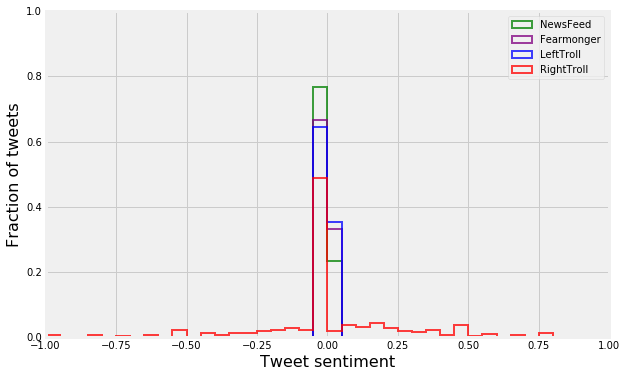

In [103]:
nRight = len(eng_tweets[eng_tweets.account_category=='RightTroll'])
nLeft = len(eng_tweets[eng_tweets.account_category=='LeftTroll'])
nNews = len(eng_tweets[eng_tweets.account_category=='NewsFeed'])
nFear = len(eng_tweets[eng_tweets.account_category=='Fearmonger'])

plt.figure(figsize=(9,6))
bins = np.arange(-1,1,0.05)

plt.hist(eng_tweets.sentiment[eng_tweets.account_category=='NewsFeed']/nNews, 
         bins=bins, weights = np.ones(nNews)/nNews, color='green', alpha=0.75, histtype='step', 
         linewidth=2, label='NewsFeed')
plt.hist(eng_tweets.sentiment[eng_tweets.account_category=='Fearmonger']/nFear, 
         bins=bins, weights = np.ones(nFear)/nFear, color='purple', alpha=0.75, histtype='step', 
         linewidth=2, label='Fearmonger')
plt.hist(eng_tweets.sentiment[eng_tweets.account_category=='LeftTroll']/nLeft, 
         bins=bins, weights = np.ones(nLeft)/nLeft, color='blue', alpha=0.75, histtype='step', 
         linewidth=2, label='LeftTroll')
plt.hist(eng_tweets.sentiment[eng_tweets.account_category=='RightTroll'], 
         bins=bins, weights = np.ones(nRight)/nRight, color='red', alpha=0.75, histtype='step', 
         linewidth=2, label='RightTroll')


plt.xlabel('Tweet sentiment', fontsize=16)
plt.ylabel('Fraction of tweets', fontsize=16)
plt.xlim(-1,1)
plt.ylim(0,1)
plt.legend()

TypeError: <lambda>() missing 1 required positional argument: 'height'

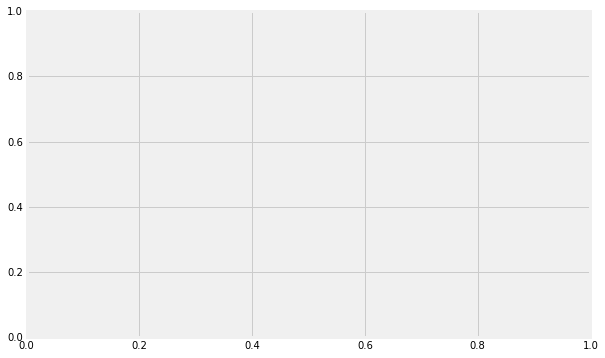

In [109]:
nRight = len(eng_tweets[eng_tweets.account_category=='RightTroll'])
nLeft = len(eng_tweets[eng_tweets.account_category=='LeftTroll'])
nNews = len(eng_tweets[eng_tweets.account_category=='NewsFeed'])
nFear = len(eng_tweets[eng_tweets.account_category=='Fearmonger'])

sent_by_

plt.figure(figsize=(9,6))
bins = np.arange(-1,1,0.05)

plt.bar(eng_tweets.polarity[eng_tweets.account_category=='NewsFeed'], 
         color='green', alpha=0.75, label='NewsFeed')
#plt.bar(eng_tweets.sentiment[eng_tweets.account_category=='Fearmonger']/nFear, 
#         bins=bins, weights = np.ones(nFear)/nFear, color='purple', alpha=0.75, histtype='step', 
#         linewidth=2, label='Fearmonger')
#plt.bar(eng_tweets.sentiment[eng_tweets.account_category=='LeftTroll']/nLeft, 
#         bins=bins, weights = np.ones(nLeft)/nLeft, color='blue', alpha=0.75, histtype='step', 
#         linewidth=2, label='LeftTroll')
#plt.bar(eng_tweets.sentiment[eng_tweets.account_category=='RightTroll'], 
#         bins=bins, weights = np.ones(nRight)/nRight, color='red', alpha=0.75, histtype='step', 
#         linewidth=2, label='RightTroll')


plt.xlabel('Tweet sentiment', fontsize=16)
plt.ylabel('Fraction of tweets', fontsize=16)
plt.xlim(-1,1)
plt.ylim(0,1)
plt.legend()

In [ ]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=123)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=123)